# NYC Taxi Trip 

# EDA

## Importing data

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')

import geopy as geopy
from geopy.distance import geodesic

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Variable Identification and Typecasting

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Summary:
    
* **vendor_id** should be categorical as it correspnds to the provider associated with the trip record

* **pickup_datetime** and **dropoff_datetime** should be datatime variables

* **store_and_fwd_flag** is also categorical

In [7]:
# Converting 'vendor_id' and 'store_and_fwd_flag' to type 'categorical'

data['vendor_id'] = data['vendor_id'].astype('category')

data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [8]:
data.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

In [9]:
# creating an instance(date) of DatetimeIndex class using "pickup_datetime"
date = pd.DatetimeIndex(data['pickup_datetime'])

In [10]:
# extracting new columns from "pickup_datetime"

# last day of year during pickup
data['trip_day_of_year'] = date.dayofyear

# month of year during pickup
data['trip_month_of_year'] = date.month

# day of week during pickup
data['trip_day_of_week'] = date.dayofweek

# day of month during pickup
data['trip_day_of_month'] = date.day

# hour during pickup
data['trip_hour'] = date.hour

In [11]:
# Dropping 'pickup_datetime' and 'dropoff_datetime' column
data = data.drop(columns = ['pickup_datetime'])
data = data.drop(columns = ['dropoff_datetime'])

* The **dropoff_datetime** column was dropped as its date information is the same as **pickup_datetime** column and the difference in the time of these varaibles is captured by the **trip_duration** variable

In [12]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6


In [13]:
data.dtypes

id                      object
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
trip_day_of_year         int64
trip_month_of_year       int64
trip_day_of_week         int64
trip_day_of_month        int64
trip_hour                int64
dtype: object

# Univariate Analysis

In [14]:
# checking for any missing values
data.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
trip_day_of_year      0
trip_month_of_year    0
trip_day_of_week      0
trip_day_of_month     0
trip_hour             0
dtype: int64

* There is no missing value in the dataset

## Latitide and Longitude

In [15]:
# segregating variables into groups
trip_pickup = ['pickup_longitude','pickup_latitude']
trip_dropoff = ['dropoff_longitude','dropoff_latitude']

In [16]:
# Function for printing descriptives

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    


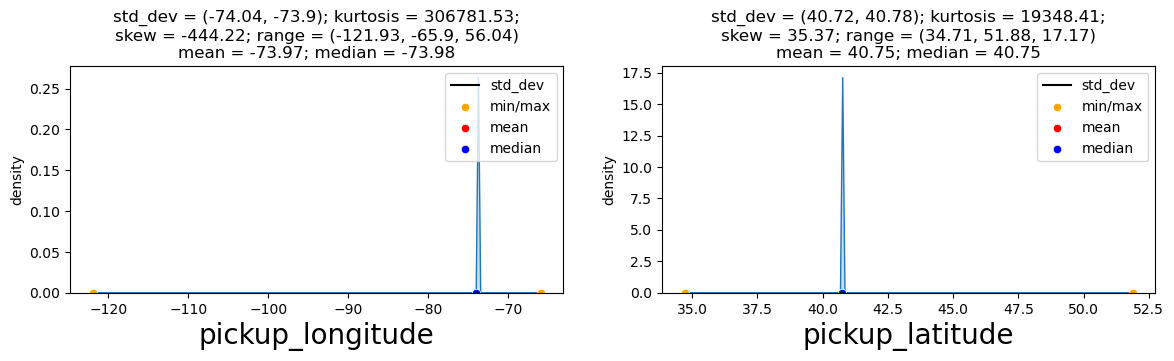

In [17]:
UVA_numeric(data,trip_pickup)

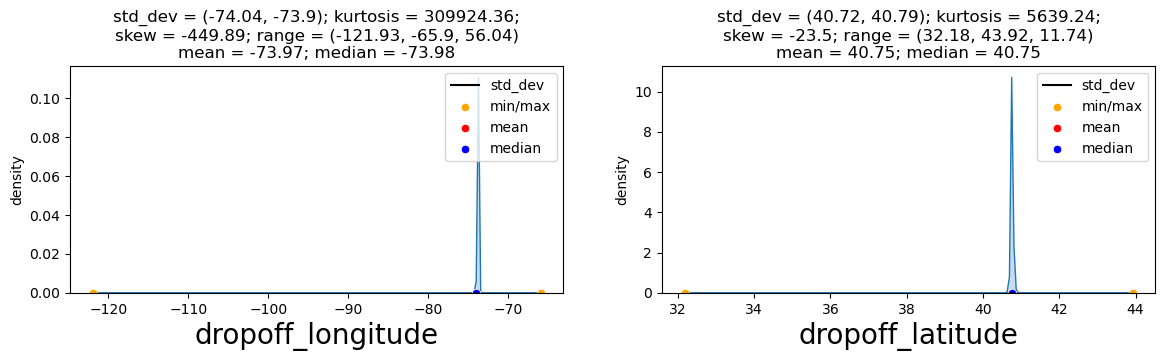

In [18]:
UVA_numeric(data,trip_dropoff)

* Since, the given dataset is for taxi trip in NYC, it would be expected that all the given coordinates would be around 40°43'50N  73°56'6''W. However, it seems that there are a few incorrect trip coordinates that are far away from these coordinates.

In [19]:
# Incorrect 'pickup_latitude' values
data[(data['pickup_latitude'] > 41.5) | (data['pickup_latitude'] < 39.5)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour
170261,id2823997,1,1,-70.511902,42.458942,-70.511902,42.458942,N,224,157,6,6,5,1
200522,id3628988,1,1,-79.569733,41.586273,-80.355431,42.090183,N,548,126,5,3,5,18
244913,id2306955,1,1,-72.809669,51.881084,-73.987228,40.750599,N,792,128,5,5,7,18
421819,id2854272,2,2,-121.933342,37.389381,-121.933304,37.389511,N,499,57,2,4,26,13
423484,id3301642,2,1,-77.039436,38.898849,-77.039436,38.898849,N,60,140,5,3,19,12
423573,id0205460,1,1,-65.897385,39.457882,-65.897385,39.457882,N,329,10,1,6,10,16
485701,id1125911,2,2,-72.074333,35.310307,-72.022408,35.173546,N,317,45,2,6,14,9
533843,id3518015,1,1,-72.591019,43.139652,-72.591019,43.139652,N,799,105,4,3,14,22
545950,id2528592,1,1,-71.881645,43.911762,-71.881645,43.911762,N,632,140,5,3,19,7
631302,id1889528,1,1,-74.195145,43.486885,-74.195145,43.486885,N,674,78,3,4,18,15


* Since these locations do not fall under NYC, these datapoints will be removed

In [20]:
# Deleting incorrect 'pickup_latitude' values
data = data[(data['pickup_latitude'] < 41.5) & (data['pickup_latitude'] > 39.5)]

* Repeating the same process for 'pickup_longitude', 'dropoff_longitude' & 'dropoff_latitude'

In [21]:
# Incorrect 'pickup_longitude' values
data[(data['pickup_longitude'] > -70) | (data['pickup_longitude'] < -77)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour
267279,id1723416,1,1,-78.547401,40.817131,-79.786133,40.917637,N,279,80,3,6,20,21


In [22]:
# Deleting incorrect 'pickup_longitude' values
data = data[(data['pickup_longitude'] < -70) & (data['pickup_longitude'] > -77)]

In [23]:
# Incorrect 'dropoff_longitude' values
data[(data['dropoff_longitude'] > -70) | (data['dropoff_longitude'] < -77)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour
441429,id0982904,1,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,119,4,3,28,13
621372,id2644780,1,2,-73.991325,40.750023,-79.518616,43.921028,N,3267,124,5,1,3,16


In [24]:
# Deleting incorrect 'dropoff_longitude' values
data = data[(data['dropoff_longitude'] < -70) & (data['dropoff_longitude'] > -77)]

In [25]:
# Incorrect 'dropoff_latitude' values
data[(data['dropoff_latitude'] > 41.5) | (data['dropoff_latitude'] < 39.5)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour
654569,id0116374,1,1,-74.007095,40.717113,-76.963242,38.946033,N,282,93,4,5,2,20
695286,id0401529,2,1,-73.980751,40.757111,-74.240051,38.478298,N,804,154,6,3,2,15


In [26]:
# Deleting incorrect 'pickup_latitude' values
data = data[(data['dropoff_latitude'] < 41.5) & (data['dropoff_latitude'] > 39.5)]

In [27]:
data.shape

(729305, 14)

In [28]:
trip_pickup = ['pickup_longitude','pickup_latitude']
trip_dropoff = ['dropoff_longitude','dropoff_latitude']

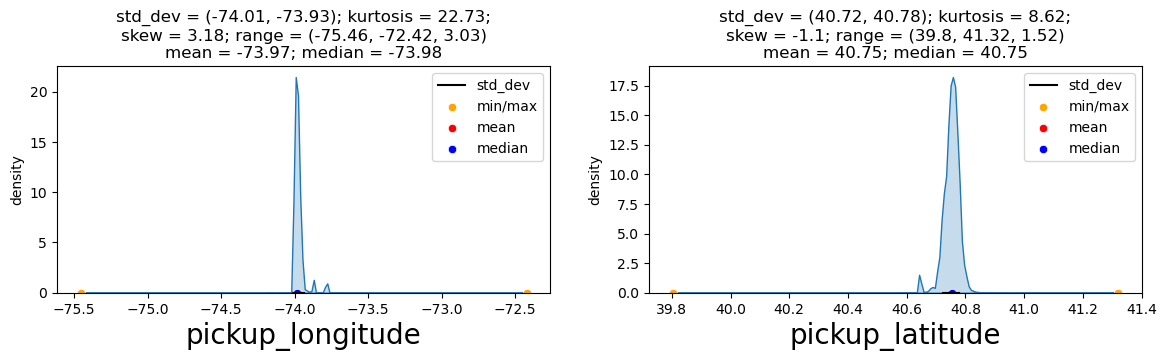

In [29]:
UVA_numeric(data,trip_pickup)

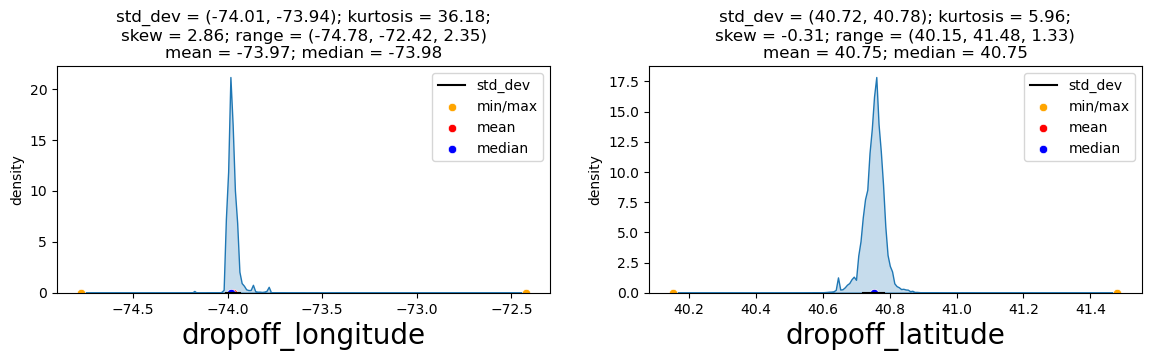

In [30]:
UVA_numeric(data,trip_dropoff)

## Eucledian distance of trip

In [31]:
#displacement
y_dist= data['pickup_longitude'] - data['dropoff_longitude']
x_dist = data['pickup_latitude'] - data['dropoff_latitude']

#square distance
data['eucl_distance'] = (y_dist ** 2) + (x_dist ** 2)

#distance
data['eucl_distance'] = data['eucl_distance'] ** 0.5

## Haversine distance of the trip

In [32]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['haversine_distance'] = haversine_array(data['pickup_latitude'].values, 
                                                     data['pickup_longitude'].values, 
                                                     data['dropoff_latitude'].values, 
                                                     data['dropoff_longitude'].values)


## Haversine direction of the trip

In [33]:
def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

data['haversine_direction'] = direction_array(data['pickup_latitude'].values, 
                                          data['pickup_longitude'].values, 
                                          data['dropoff_latitude'].values, 
                                          data['dropoff_longitude'].values)

* Haversine direction represents the information of angle of the line connecting the dropoff and pickup point over the surface of earth wrt equator.

In [34]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16,0.012592,1.199073,-135.634530
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23,0.037371,4.129111,-172.445217
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17,0.072712,7.250753,34.916093
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9,0.021473,2.361097,10.043567
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6,0.043264,4.328534,34.280582


## Trip distance using OSRM

In [35]:
s1 = pd.read_csv('fastest_routes_train_part_1.zip', usecols=['id', 'total_distance', 'total_travel_time'])
s2 = pd.read_csv('fastest_routes_train_part_2.zip', usecols=['id', 'total_distance', 'total_travel_time'])

data_street_info = pd.concat((s1, s2))
data = data.merge(data_street_info, how='left', on='id')

In [36]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,total_distance,total_travel_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16,0.012592,1.199073,-135.634530,1630.9,172.5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23,0.037371,4.129111,-172.445217,5428.7,581.8
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17,0.072712,7.250753,34.916093,9327.8,748.9
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9,0.021473,2.361097,10.043567,8022.7,612.2
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6,0.043264,4.328534,34.280582,5468.7,645.0


In [37]:
data.rename({'total_distance': 'OSRM_distance', 'total_travel_time': 'OSRM_trip_duration'}, axis=1, inplace=True)
data = data.drop('OSRM_trip_duration', 1)

In [38]:
# checking for any missing values
data.isnull().sum()

id                     0
vendor_id              0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
trip_day_of_year       0
trip_month_of_year     0
trip_day_of_week       0
trip_day_of_month      0
trip_hour              0
eucl_distance          0
haversine_distance     0
haversine_direction    0
OSRM_distance          1
dtype: int64

In [39]:
# Imputing median in the 1 missing rows of 'OSRM_distance' and 'total_travel_time'
data['OSRM_distance'] = data['OSRM_distance'].fillna(value = data['OSRM_distance'].median())

In [40]:
# checking for any missing values
data.isnull().sum()

id                     0
vendor_id              0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
trip_day_of_year       0
trip_month_of_year     0
trip_day_of_week       0
trip_day_of_month      0
trip_hour              0
eucl_distance          0
haversine_distance     0
haversine_direction    0
OSRM_distance          0
dtype: int64

## trip_day_of_year

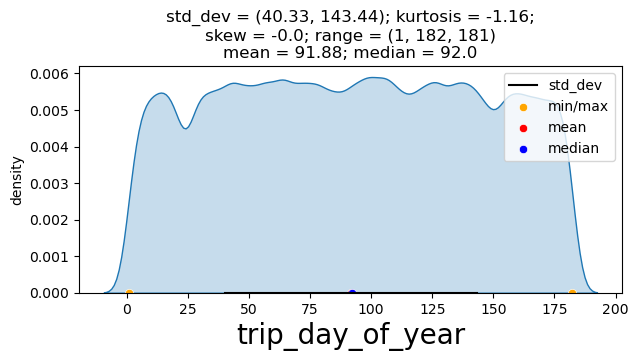

In [41]:
UVA_numeric(data,['trip_day_of_year'])

* The data seems evenly spread out for all days of the year

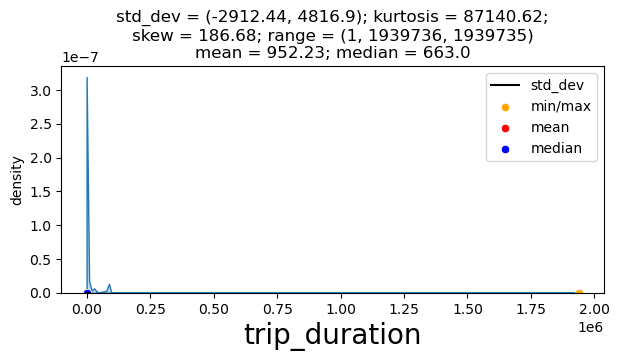

In [42]:
UVA_numeric(data,['trip_duration'])

* There seems to be some very high incorrect trip duration values in the dataset. 

In [43]:
# Trips that have trip duration mentioned as more than 12 hours
data[(data['trip_duration'] > 43200)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance
15,id2930166,2,1,-74.002876,40.734131,-73.955399,40.767502,N,86164,52,2,6,21,1,0.058032,5.455636,47.128685,7456.0
610,id2903714,2,6,-73.990753,40.730415,-73.968506,40.750965,N,59458,13,1,2,13,7,0.030286,2.955407,39.353380,3482.8
3018,id1734527,2,1,-73.981789,40.746292,-73.984619,40.763962,N,86342,169,6,4,17,12,0.017895,1.979191,-6.917804,2841.6
3543,id1460495,2,1,-73.974472,40.753895,-73.971481,40.795464,N,86145,104,4,2,13,22,0.041676,4.629090,3.117634,7069.8
4716,id0175135,2,1,-74.000954,40.741982,-73.966263,40.763000,N,86268,117,4,1,26,16,0.040562,3.741861,51.335110,5007.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726077,id3454276,2,5,-73.978630,40.762920,-73.947388,40.711311,N,85962,102,4,0,11,20,0.060329,6.313571,155.349206,11623.9
726154,id0012592,2,1,-73.996918,40.752659,-74.003098,40.718094,N,84188,76,3,2,16,12,0.035113,3.878559,-172.282895,4829.4
726764,id3275402,2,1,-74.005913,40.742966,-73.978806,40.761127,N,86123,87,3,6,27,1,0.032629,3.048304,48.500448,3876.6
727601,id1563790,2,1,-73.988434,40.753716,-74.000610,40.720901,N,85741,96,4,1,5,13,0.035000,3.790237,-164.291732,4417.2


In [44]:
# Deleting trips that have trip duration mentioned as more than 12 hours
data = data[(data['trip_duration'] < 43200)]

In [45]:
# Trips that have trip duration mentioned as less than 30 secs
data[(data['trip_duration'] < 30)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance
136,id1514658,1,2,-73.902054,40.764011,-73.902061,40.764023,N,7,82,3,1,22,8,0.000014,0.001426,-26.790890,1.4
415,id0446273,2,5,-73.863091,40.769840,-73.863312,40.769630,N,10,95,4,0,4,12,0.000305,0.029857,-141.387330,0.0
448,id1326538,2,1,-73.974197,40.762718,-73.975693,40.760723,N,9,78,3,4,18,12,0.002493,0.255100,-150.415435,255.3
3169,id1620472,1,1,-73.957687,40.718021,-73.957687,40.718025,N,2,49,2,3,18,3,0.000004,0.000424,0.000000,0.3
3354,id3986156,2,2,-73.998528,40.745220,-73.995461,40.746552,N,27,46,2,0,15,15,0.003344,0.297778,60.188112,406.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728703,id3423342,2,2,-73.977898,40.766392,-73.977898,40.766392,N,14,126,5,3,5,21,0.000000,0.000000,0.000000,0.0
728776,id0802812,1,1,-73.985931,40.767986,-73.985931,40.767982,N,6,133,5,3,12,5,0.000004,0.000424,180.000000,0.2
728994,id2277062,2,2,-73.978523,40.765221,-73.979462,40.765781,N,12,48,2,2,17,5,0.001093,0.100667,-51.727113,931.7
729005,id3715420,1,1,-73.945587,40.751602,-73.945602,40.751568,N,27,150,5,6,29,12,0.000038,0.004028,-161.392258,4.8


In [46]:
# Deleting trips that have trip duration mentioned as less than 30 secs
data = data[(data['trip_duration'] > 30)]

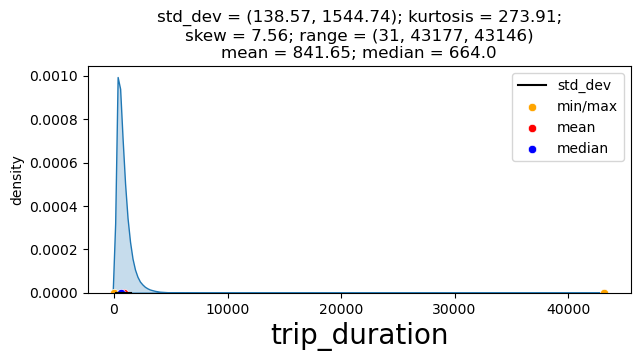

In [47]:
UVA_numeric(data,['trip_duration'])

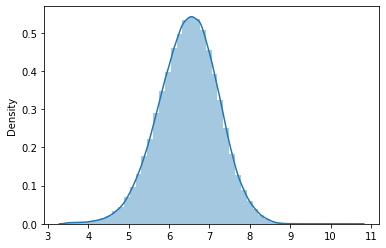

In [48]:
log_trip_duration = np.log(data['trip_duration'].values)
sns.distplot(log_trip_duration)
plt.show()

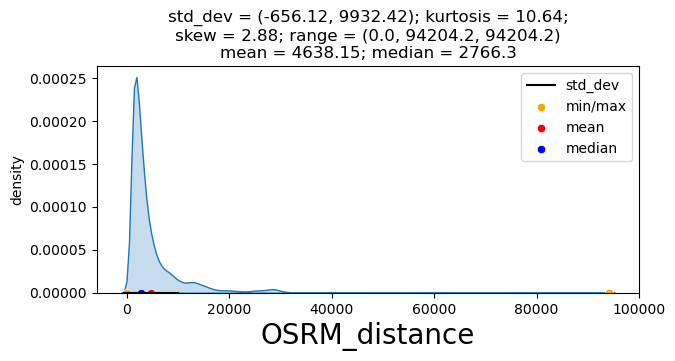

In [49]:
UVA_numeric(data,['OSRM_distance'])

## passenger_count

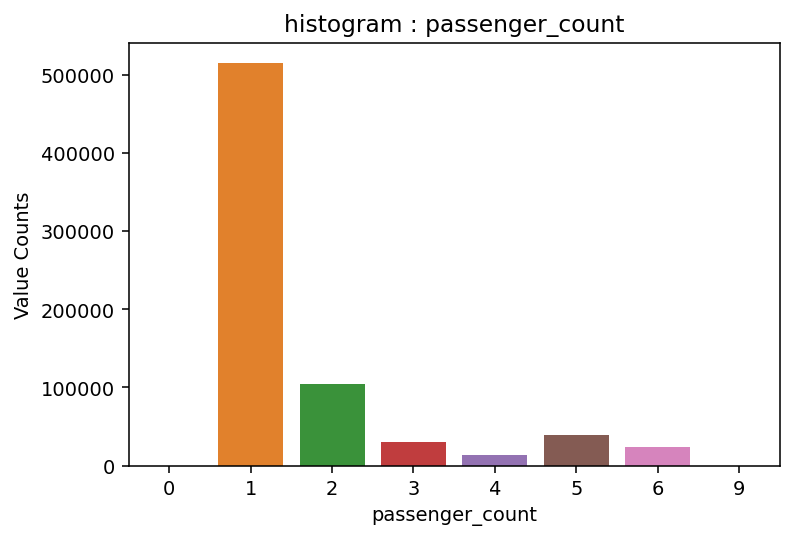

In [50]:
# plotting barplot for passenger_count
plt.figure(dpi = 140)
sns.barplot(x=data['passenger_count'].value_counts().index, y=data['passenger_count'].value_counts().values)
plt.xlabel("passenger_count")
plt.ylabel('Value Counts')
plt.title("histogram : passenger_count")
plt.show()

In [51]:
data[(data['passenger_count'] == 0)]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance
3572,id3364866,1,0,-73.990479,40.742004,-73.989243,40.763680,N,1029,44,2,5,13,14,0.021710,2.412410,2.473016,4205.2
23847,id3485118,1,0,-73.987572,40.754566,-73.972031,40.762836,N,981,132,5,2,11,19,0.017605,1.599713,54.905094,2140.8
101709,id1220914,2,0,-73.959999,40.766861,-73.960106,40.766911,N,48,17,1,6,17,20,0.000118,0.010551,-58.490770,10.6
186912,id3494250,1,0,-74.005089,40.729038,-74.032486,40.619579,N,1121,93,4,5,2,2,0.112836,12.388638,-169.242430,15224.4
194925,id1205792,1,0,-73.982063,40.763798,-74.188072,40.694042,N,2191,71,3,4,11,12,0.217498,19.013222,-114.008945,25173.5
247689,id2891366,1,0,-73.983543,40.716404,-73.983543,40.716404,N,105,49,2,3,18,21,0.000000,0.000000,0.000000,0.0
272110,id0878599,1,0,-73.928078,40.736412,-73.985519,40.758972,N,3243,25,1,0,25,8,0.061713,5.450500,-62.578273,7041.1
315011,id1846091,2,0,-73.919167,40.686878,-73.919151,40.686874,N,78,16,1,5,16,0,0.000016,0.001355,108.246965,1.3
319171,id2247129,2,0,-73.965027,40.775269,-73.973450,40.840618,N,1556,13,1,2,13,11,0.065890,7.301039,-5.569207,16109.8
329270,id3762593,1,0,-73.815224,40.700081,-73.950699,40.755222,N,2251,4,1,0,4,12,0.146267,12.958301,-61.715705,17318.4


* There seems to be some datapoints where the **passenger_count** is listed as 0. These points will be deleted.

In [52]:
# Removing trips with 'passenger_count' as 0
data = data[~(data['passenger_count'] == 0)]

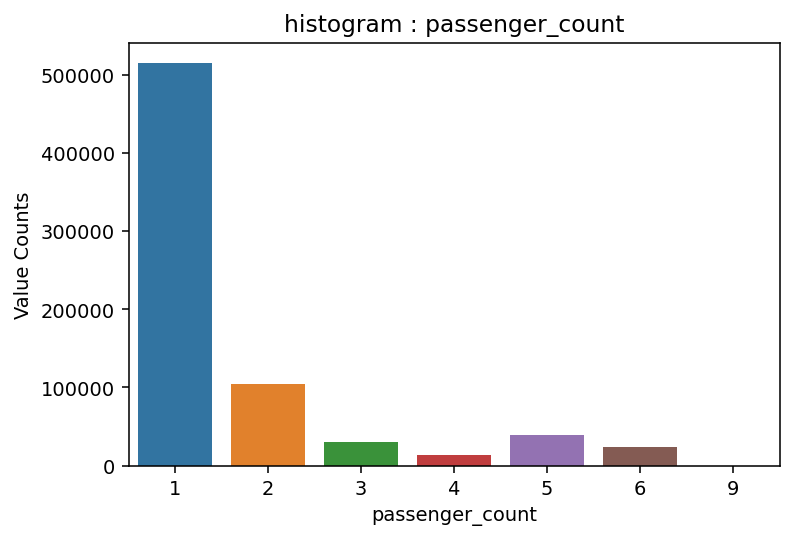

In [53]:
# plotting barplot for passenger_count
plt.figure(dpi = 140)
sns.barplot(x=data['passenger_count'].value_counts().index, y=data['passenger_count'].value_counts().values)
plt.xlabel("passenger_count")
plt.ylabel('Value Counts')
plt.title("histogram : passenger_count")
plt.show()

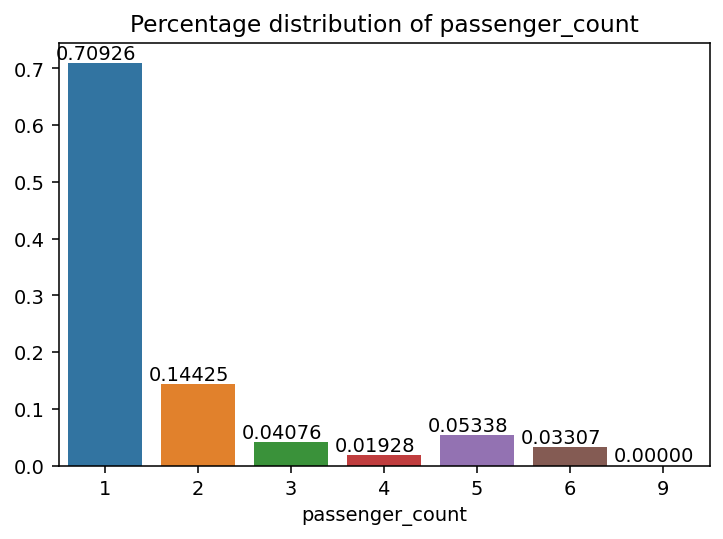

In [54]:
# same plot as above with percentages

plt.figure(dpi = 140)
ax = sns.barplot(x=data['passenger_count'].value_counts().index, y = data['passenger_count'].value_counts(normalize=True).values, orient = 'v')
plt.title('Percentage distribution of passenger_count')
plt.xlabel('passenger_count')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

* Most common **passenger_count** value is 1 and very few datapoints are avaialble for **passenger_count** 7 and above

## trip_hour

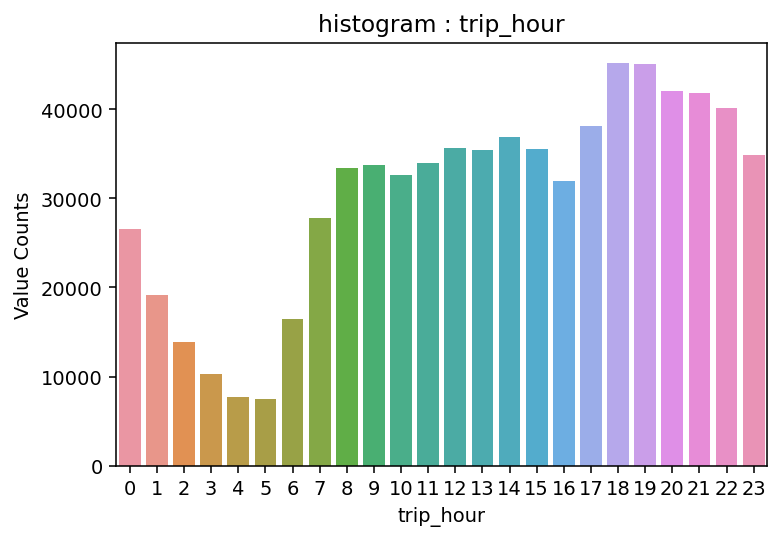

In [55]:
# plotting barplot for trip_hour
plt.figure(dpi = 140)
sns.barplot(x=data['trip_hour'].value_counts().index, y=data['trip_hour'].value_counts().values)
plt.xlabel("trip_hour")
plt.ylabel('Value Counts')
plt.title("histogram : trip_hour")
plt.show()

* The number of trips at evening is the highest, is moderate during morning and afternoon and is minimum between 12:00 am to 7:00 am. The effect of this on trip duration will be investigated later.

## trip_day_of_month

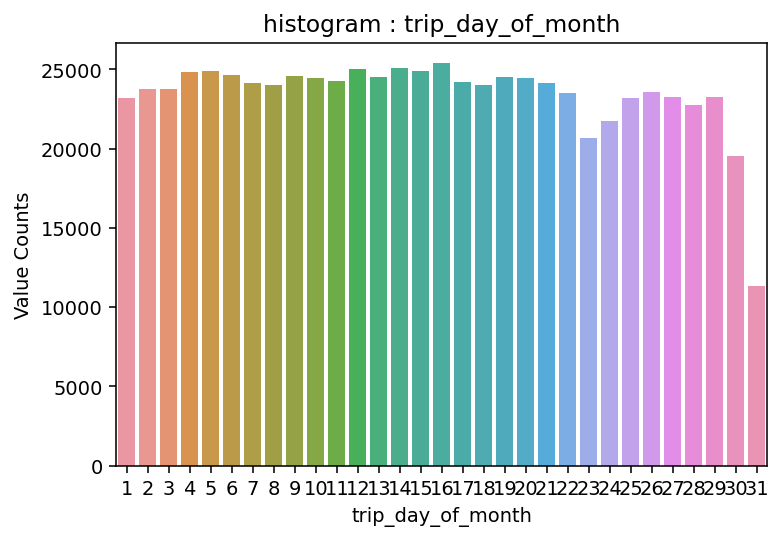

In [56]:
# plotting barplot for trip_hour
plt.figure(dpi = 140)
sns.barplot(x=data['trip_day_of_month'].value_counts().index, y=data['trip_day_of_month'].value_counts().values)
plt.xlabel("trip_day_of_month")
plt.ylabel('Value Counts')
plt.title("histogram : trip_day_of_month")
plt.show()

* Trips seem evenly distributed over all days of the months. The lower value on day 30,31 is expected as the dataset contains information from Jan-June which contains 2 months with 30 days and also Feb

## trip_month_of_year

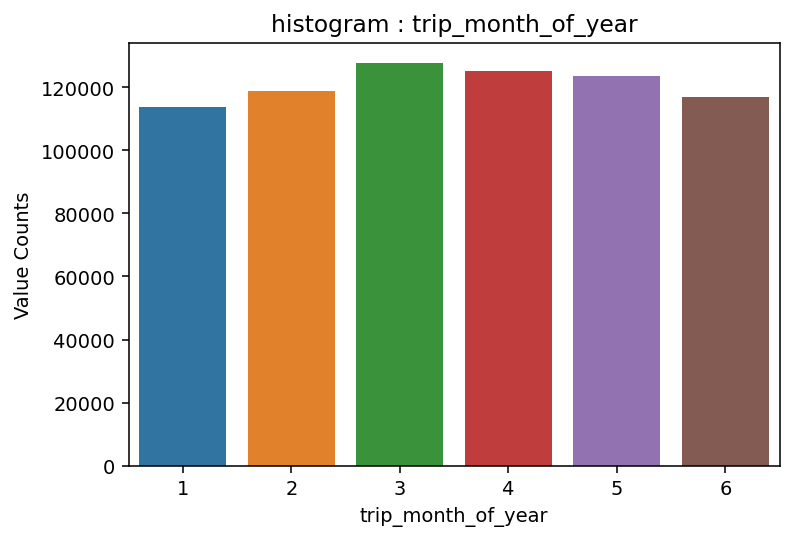

In [57]:
# plotting barplot for trip_month_of_year
plt.figure(dpi = 140)
sns.barplot(x=data['trip_month_of_year'].value_counts().index, y=data['trip_month_of_year'].value_counts().values)
plt.xlabel("trip_month_of_year")
plt.ylabel('Value Counts')
plt.title("histogram : trip_month_of_year")
plt.show()

* Trips seem evenly distributed over all months of the year

## trip_day_of_week

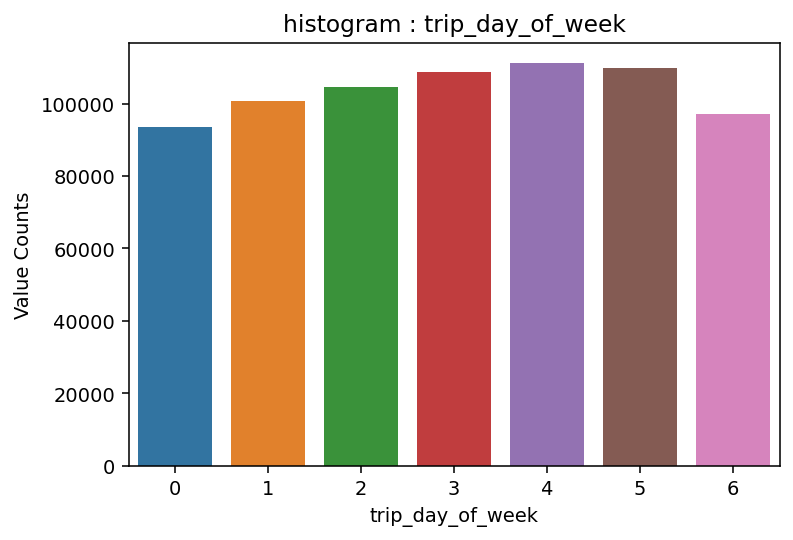

In [58]:
# plotting barplot for trip_day_of_week
plt.figure(dpi = 140)
sns.barplot(x=data['trip_day_of_week'].value_counts().index, y=data['trip_day_of_week'].value_counts().values)
plt.xlabel("trip_day_of_week")
plt.ylabel('Value Counts')
plt.title("histogram : trip_day_of_week")
plt.show()

* In the above plot 0 is Monday and 6 is Sunday

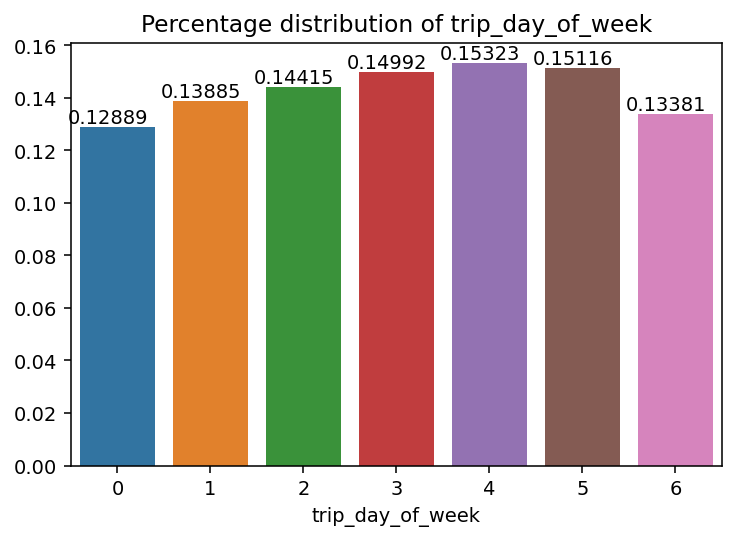

In [59]:
# same plot as above with percentages

plt.figure(dpi = 140)
ax = sns.barplot(x=data['trip_day_of_week'].value_counts().index, y = data['trip_day_of_week'].value_counts(normalize=True).values, orient = 'v')
plt.title('Percentage distribution of trip_day_of_week')
plt.xlabel('trip_day_of_week')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

## vendor_id

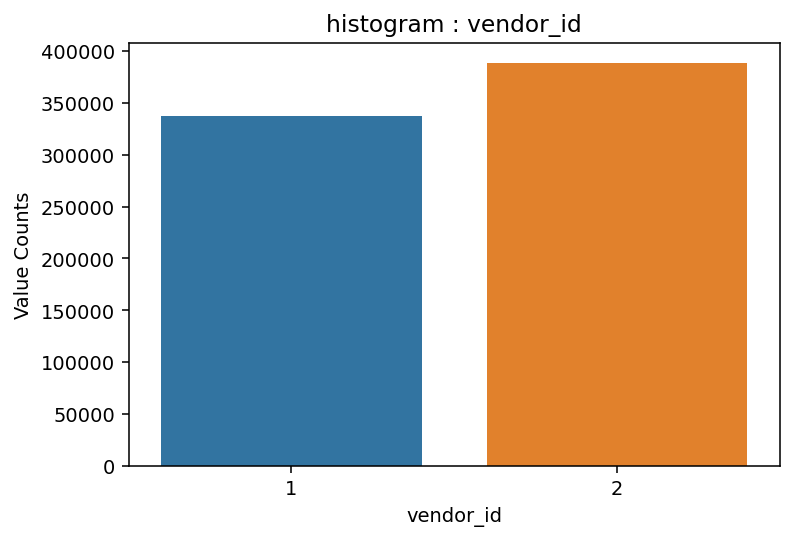

In [60]:
# plotting barplot for vendor_id
plt.figure(dpi = 140)
sns.barplot(x=data['vendor_id'].value_counts().index, y=data['vendor_id'].value_counts().values)
plt.xlabel("vendor_id")
plt.ylabel('Value Counts')
plt.title("histogram : vendor_id")
plt.show()

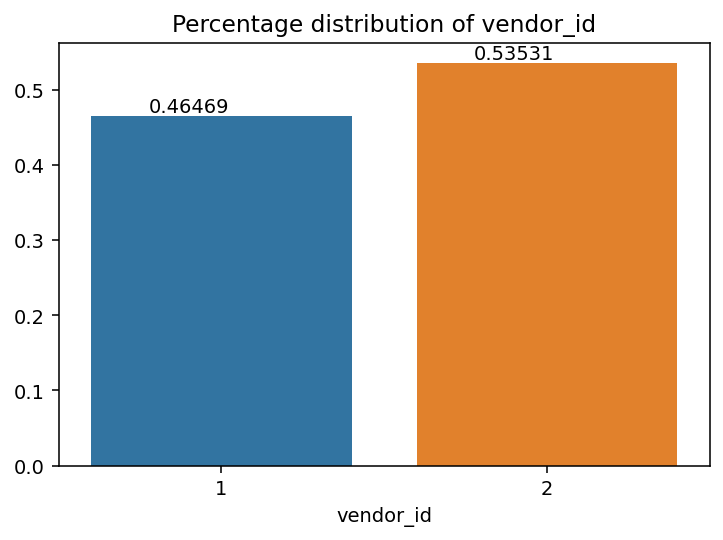

In [61]:
# same plot as above with percentages

plt.figure(dpi = 140)
ax = sns.barplot(x=data['vendor_id'].value_counts().index, y = data['vendor_id'].value_counts(normalize=True).values, orient = 'v')
plt.title('Percentage distribution of vendor_id')
plt.xlabel('vendor_id')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

## store_and_fwd_flag  

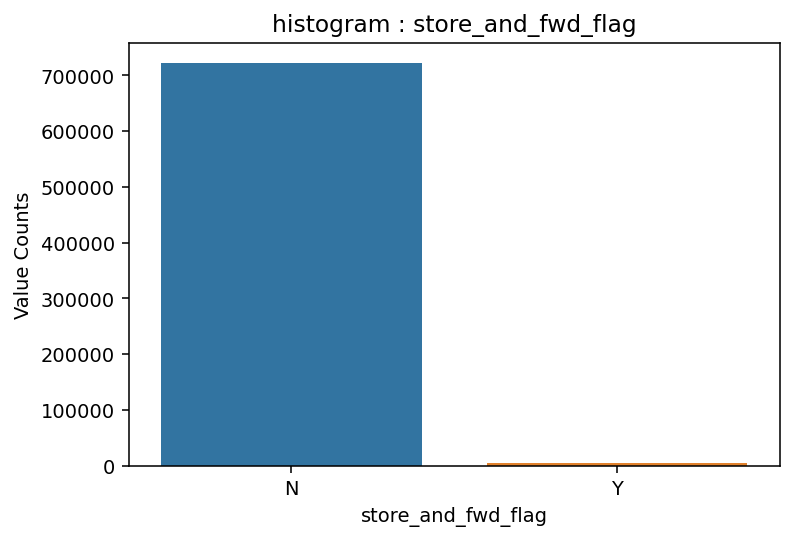

In [62]:
# plotting barplot for store_and_fwd_flag 
plt.figure(dpi = 140)
sns.barplot(x=data['store_and_fwd_flag'].value_counts().index, y=data['store_and_fwd_flag'].value_counts().values)
plt.xlabel("store_and_fwd_flag")
plt.ylabel('Value Counts')
plt.title("histogram : store_and_fwd_flag")
plt.show()

* Most of the data available is for 'store_and_fwd_flag' as 'N'

# Bivariate Analysis 

In [63]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
trip_day_of_year         int64
trip_month_of_year       int64
trip_day_of_week         int64
trip_day_of_month        int64
trip_hour                int64
eucl_distance          float64
haversine_distance     float64
haversine_direction    float64
OSRM_distance          float64
dtype: object

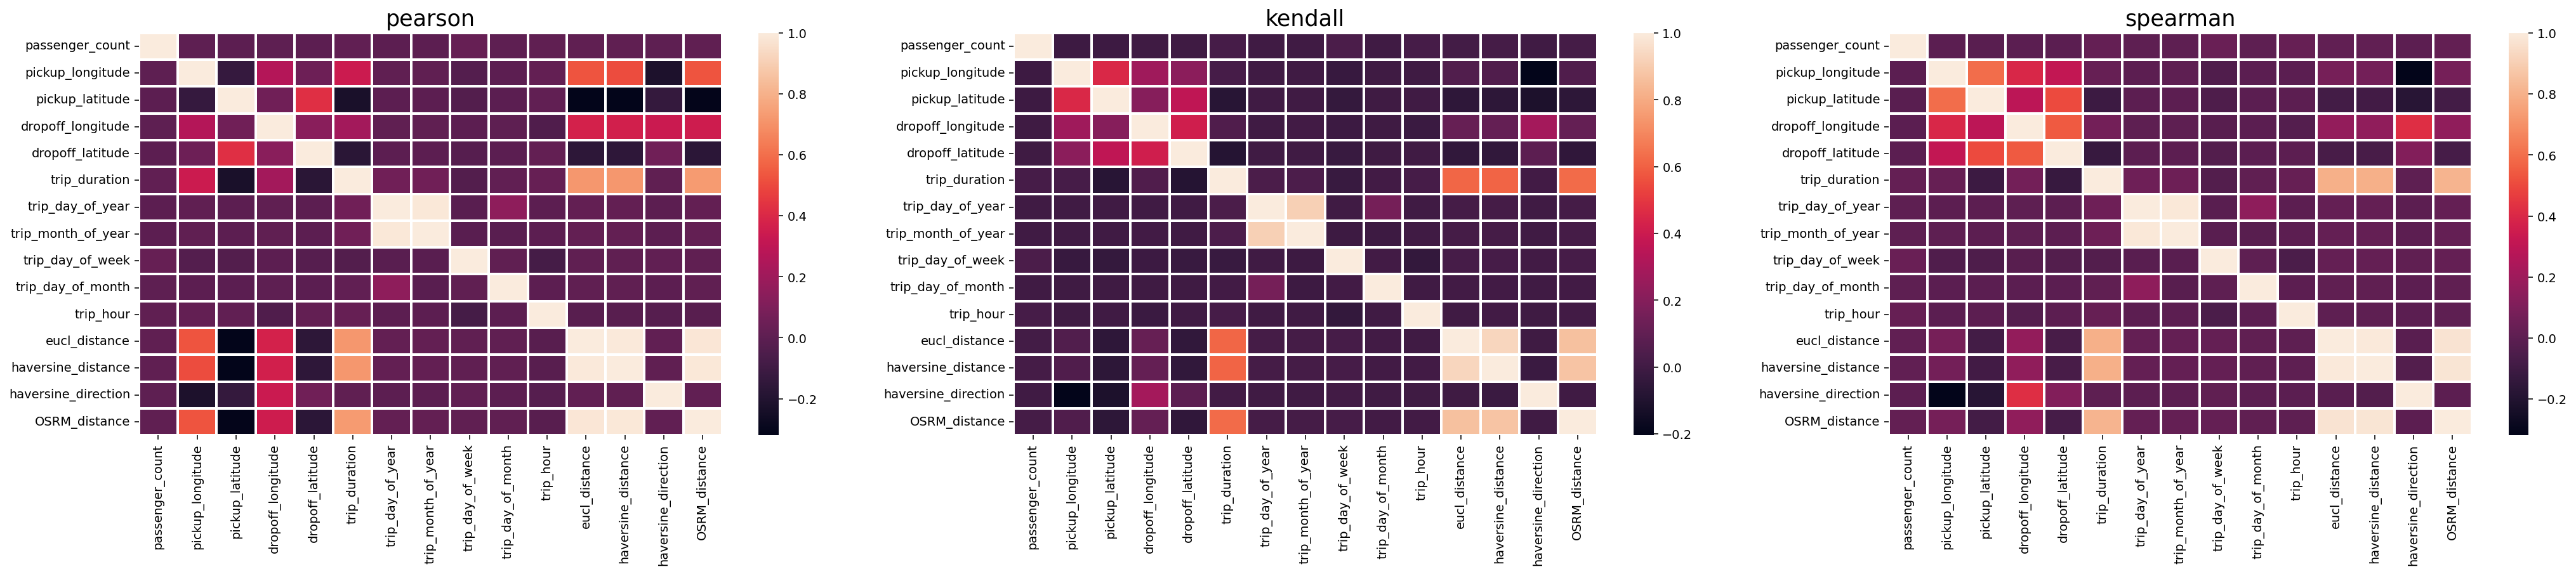

In [64]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* The trip distance and pickup/dropoff coordinates seem to have to strongest relation with target varaible 'trip duration'

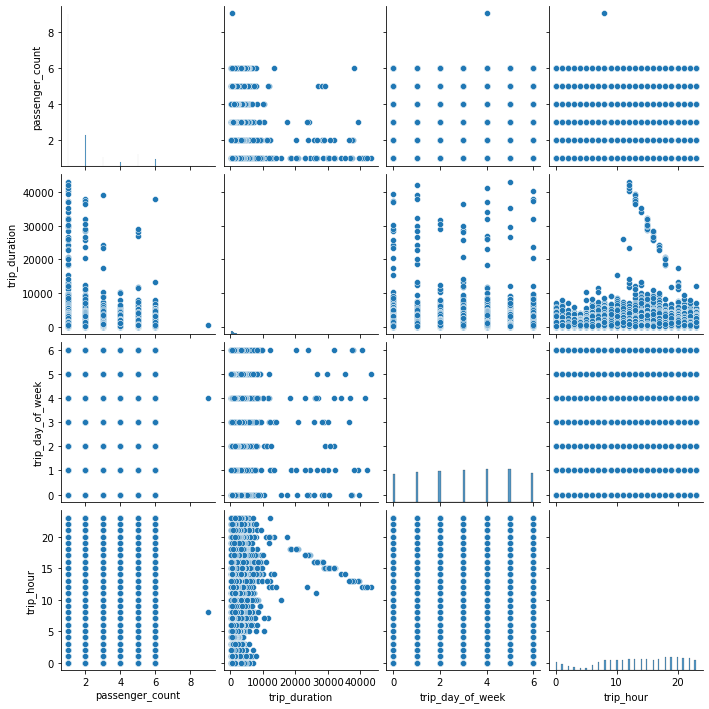

In [65]:
# Grouping variables and making plots
plot = ['passenger_count','trip_duration','trip_day_of_week','trip_hour']
sns.pairplot(numerical[plot])

* There does not appear to be a strong monotonic relation between any of the variables

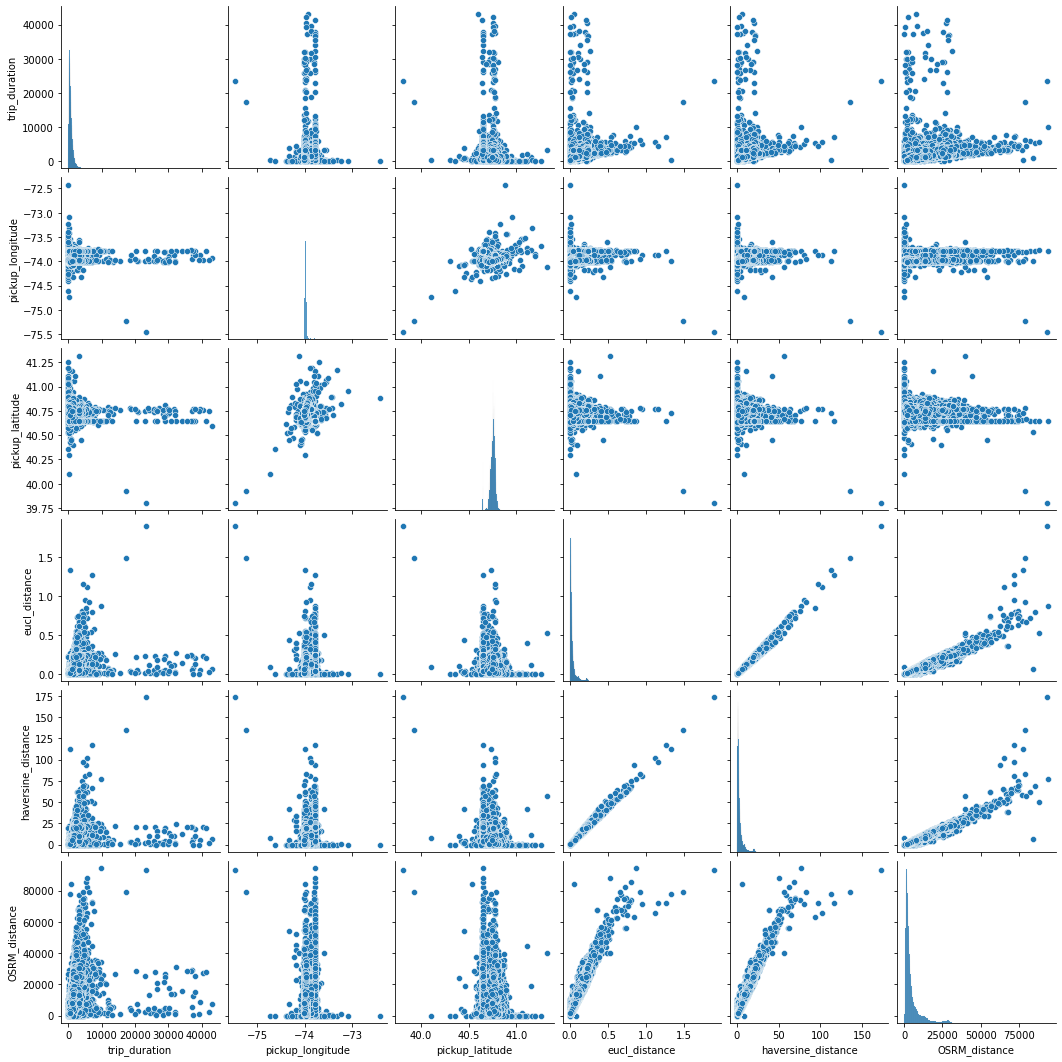

In [66]:
plot = ['trip_duration','pickup_longitude','pickup_latitude','eucl_distance','haversine_distance','OSRM_distance']
sns.pairplot(numerical[plot])

**Checking if weekends have any signicant effect on duration of trip:**

In [67]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval


def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval


def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [68]:
# segregating 'trip_day_of_week' into weekdays/weekends

data['is_weekday'] = (data['trip_day_of_week']< 5).astype(int)

In [69]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance,is_weekday
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16,0.012592,1.199073,-135.634530,1630.9,1
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23,0.037371,4.129111,-172.445217,5428.7,1
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17,0.072712,7.250753,34.916093,9327.8,0
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9,0.021473,2.361097,10.043567,8022.7,1
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6,0.043264,4.328534,34.280582,5468.7,1


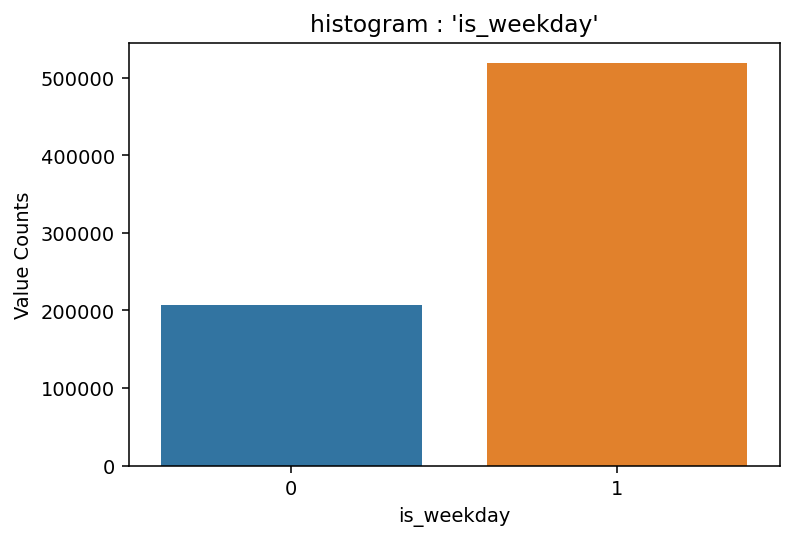

In [70]:
# plotting barplot for weekend
plt.figure(dpi = 140)
sns.barplot(x=data['is_weekday'].value_counts().index, y=data['is_weekday'].value_counts().values)
plt.xlabel('is_weekday')
plt.ylabel('Value Counts')
plt.title("histogram : 'is_weekday'")
plt.show()

* 0 satnds for "False", i.e. the day was a weekend

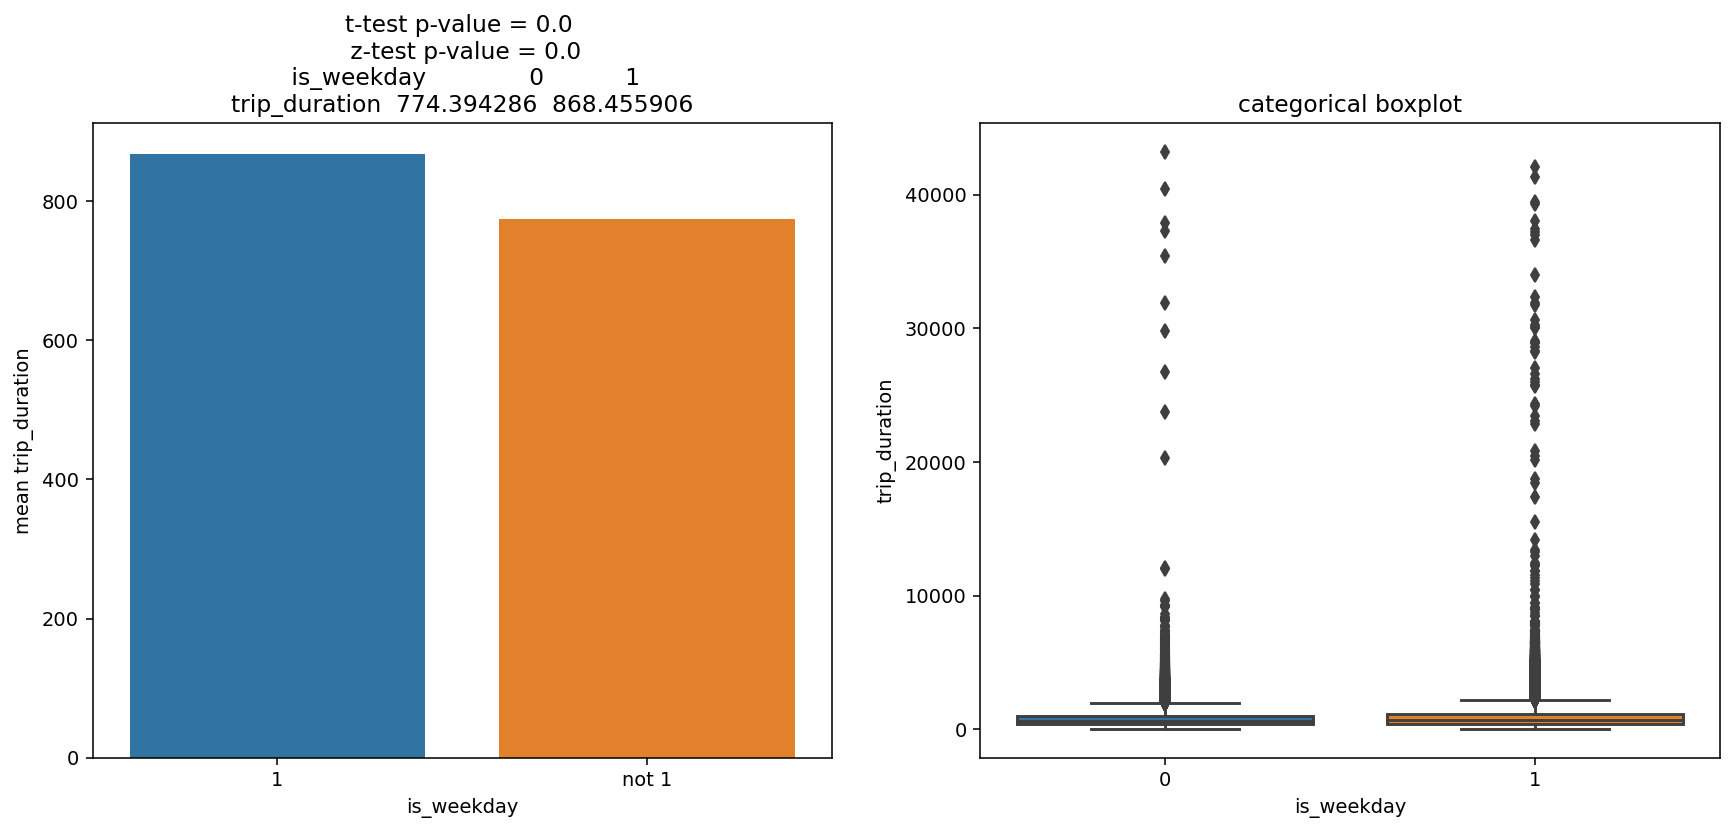

In [71]:
Bivariate_cont_cat(data, 'trip_duration', 'is_weekday', 1)

* There seems to be a significant difference between between the **trip duration** and whether the day was a weekday or weekend.

* Weekends have lower **trip duration**, which seems intuitive due to lower traffic during weekends.

**Checking if 'passenger_count' has any signicant effect on duration of trip:**

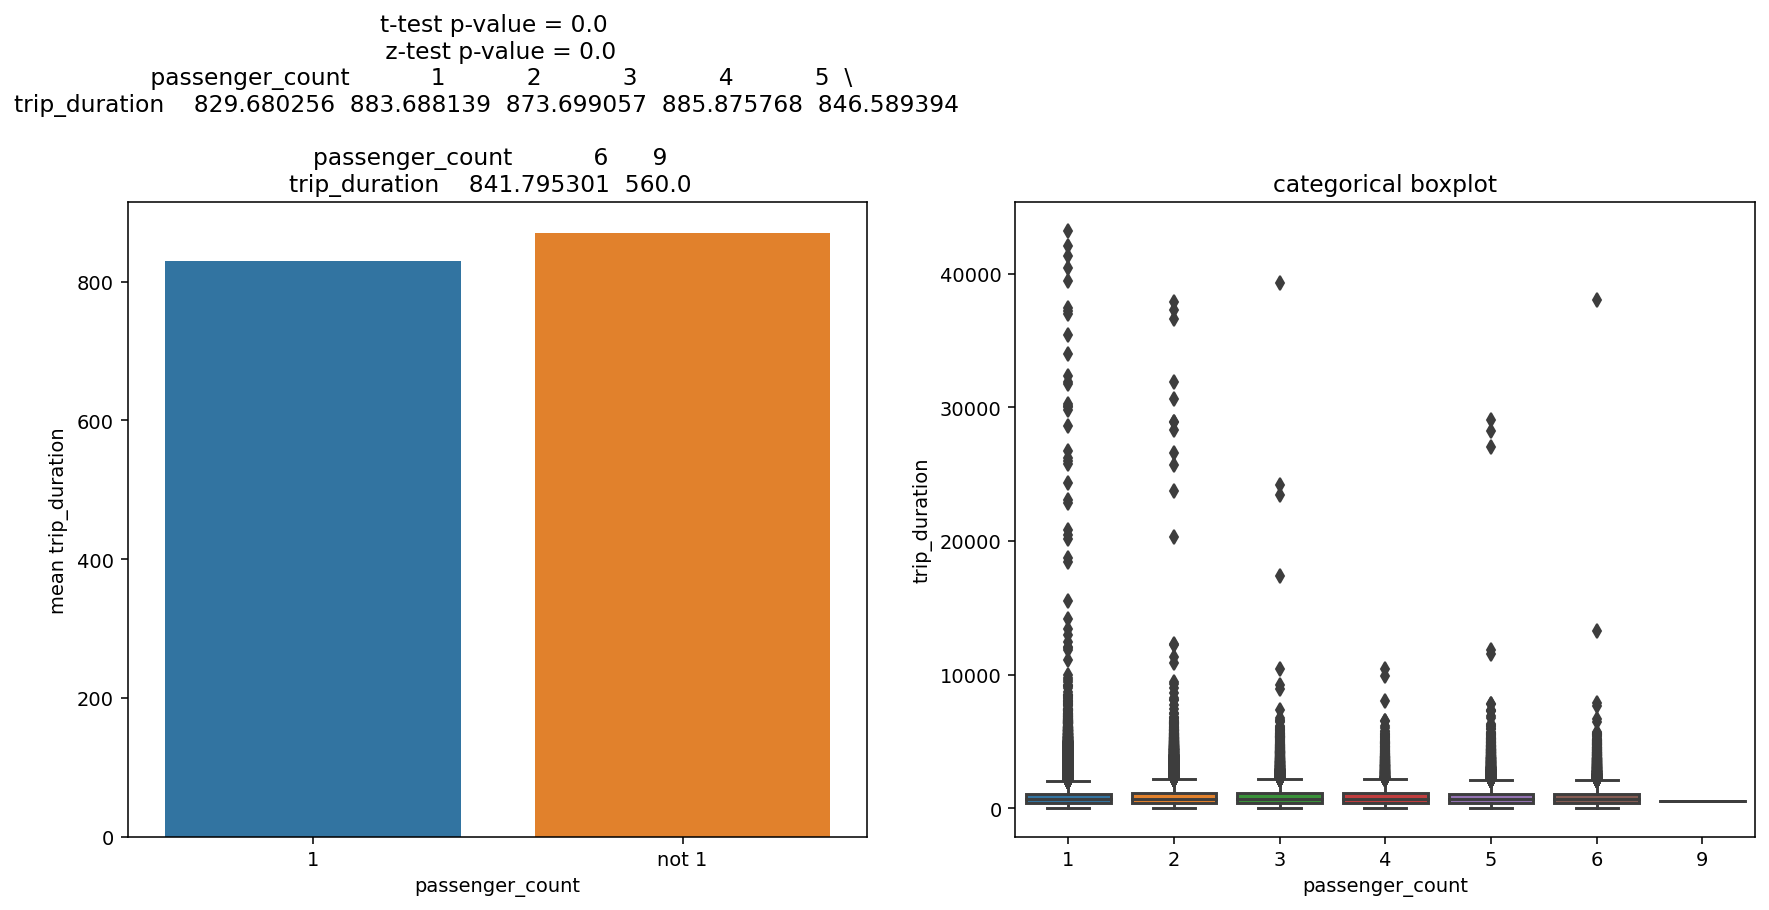

In [72]:
Bivariate_cont_cat(data, 'trip_duration', 'passenger_count', 1)

* It seems that having a single passenger also corresponds to lower **trip_duration**

**Checking if trip_hour has any significant effect on trip_duration**

In [73]:
# segregating 'trip_hour' into late_night, daytime and evening

data['trip_time'] = pd.cut(data.trip_hour,bins=[-1,8,17,23],labels=['late_night','morning/afternoon','evening'])

In [74]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance,is_weekday,trip_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16,0.012592,1.199073,-135.634530,1630.9,1,morning/afternoon
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23,0.037371,4.129111,-172.445217,5428.7,1,evening
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17,0.072712,7.250753,34.916093,9327.8,0,morning/afternoon
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9,0.021473,2.361097,10.043567,8022.7,1,morning/afternoon
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6,0.043264,4.328534,34.280582,5468.7,1,late_night


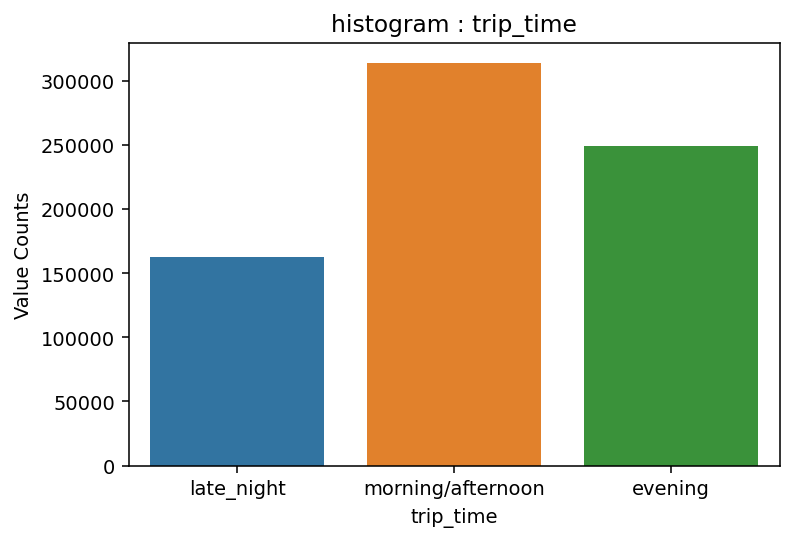

In [75]:
# plotting barplot for 'trip_time'
plt.figure(dpi = 140)
sns.barplot(x=data['trip_time'].value_counts().index, y=data['trip_time'].value_counts().values)
plt.xlabel("trip_time")
plt.ylabel('Value Counts')
plt.title("histogram : trip_time")
plt.show()

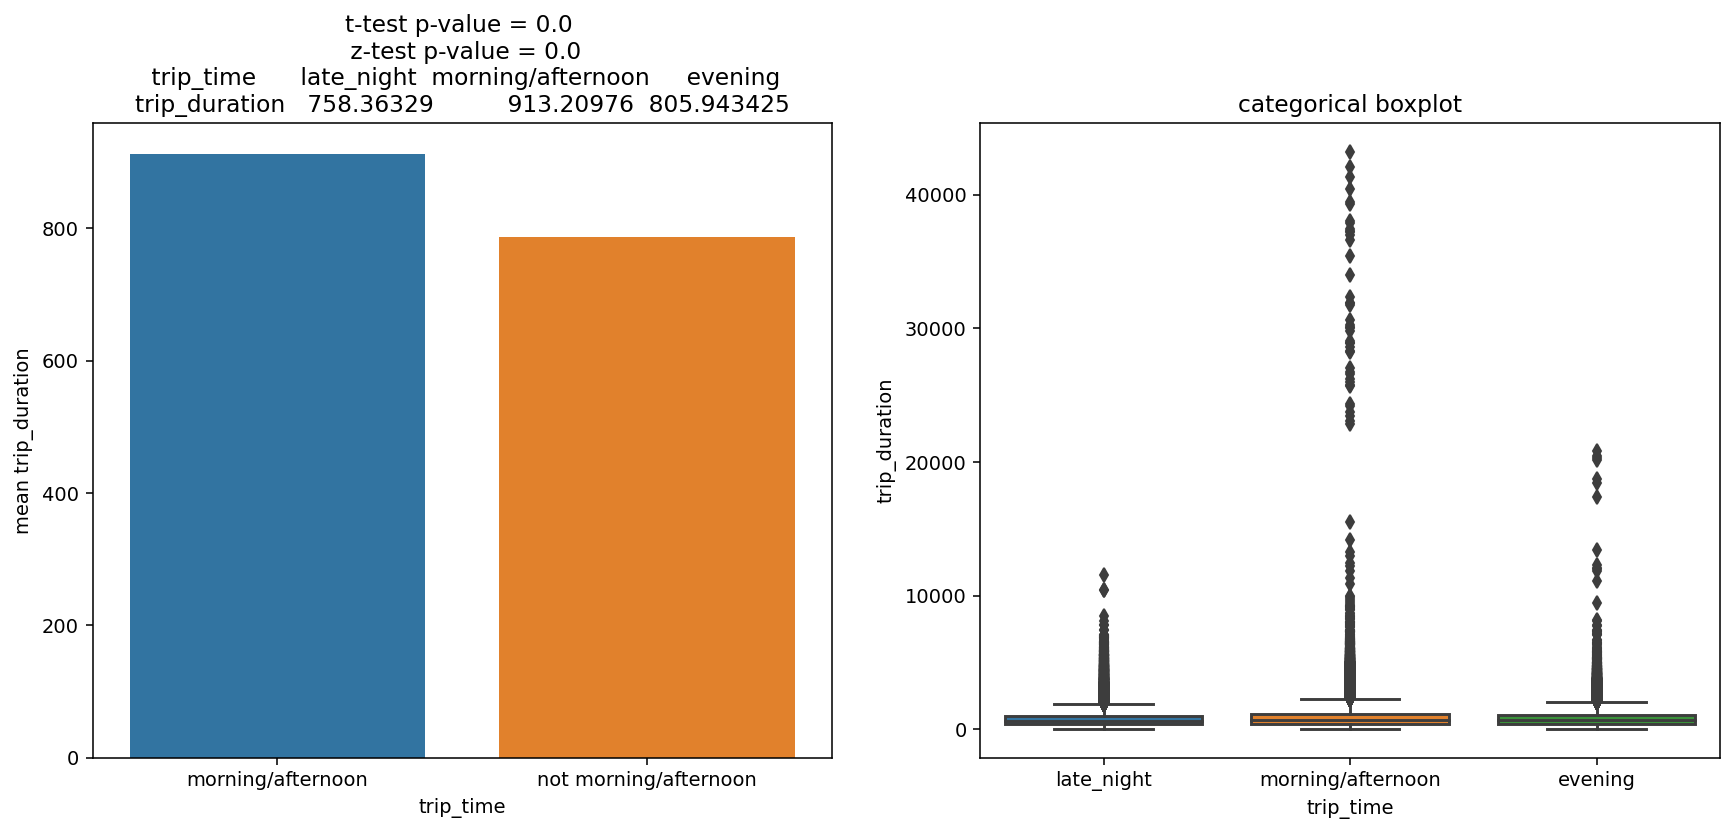

In [76]:
Bivariate_cont_cat(data, 'trip_duration', 'trip_time', 'morning/afternoon')

* The **trip_duration** during morning/afternoon is significantly higher than **trip_duration** during other times

# Model building

In [77]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,eucl_distance,haversine_distance,haversine_direction,OSRM_distance,is_weekday,trip_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,29,16,0.012592,1.199073,-135.634530,1630.9,1,morning/afternoon
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,11,23,0.037371,4.129111,-172.445217,5428.7,1,evening
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,21,17,0.072712,7.250753,34.916093,9327.8,0,morning/afternoon
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,5,9,0.021473,2.361097,10.043567,8022.7,1,morning/afternoon
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,17,6,0.043264,4.328534,34.280582,5468.7,1,late_night


In [78]:
# checking for any missing values
data.isnull().sum()

id                     0
vendor_id              0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
trip_day_of_year       0
trip_month_of_year     0
trip_day_of_week       0
trip_day_of_month      0
trip_hour              0
eucl_distance          0
haversine_distance     0
haversine_direction    0
OSRM_distance          0
is_weekday             0
trip_time              0
dtype: int64

### Creating dummy variables

In [79]:
data = pd.get_dummies(data, columns=["trip_time","vendor_id"],drop_first=True)  

### Removing columns from the dataframe

In [80]:
# ID is removed as it does not provide any useful information to predict trip duration
data = data.drop('id', 1)   

# 'store_and_fwd_flag' is dropped as this information is not available before the trip starts
data = data.drop('store_and_fwd_flag', 1)  

# 'haversine_direction' is dropped as this variable seems to have no correlation with 'trip_duration'
data = data.drop('haversine_direction', 1)  

# Eucledian and haversine distance are removed since these variables provide the same kind of information as OSRM distance, but with less acuuracy
data = data.drop('eucl_distance', 1)  
data = data.drop('haversine_distance', 1)  

In [81]:
# Moving vendor_id to the first column
data.insert(0, 'vendor_id_2', data.pop('vendor_id_2'))

In [937]:
data.head()

,vendor_id_2,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,1,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,0,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,1,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,1,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,0,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


## Baseline Model (Taking avg of train Y as the prediction)

In [120]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

In [121]:
test_predict=np.empty(len(test_y))

In [122]:
test_predict.fill(train_y.mean())

In [123]:
mae(test_predict, test_y)

470.2964488939279

In [124]:
mse(test_predict, test_y)

510679.0635177673

## KNN

### Taking a subset of data to reduce computational time

In [359]:
df = data.sample(20000,random_state=1)

### Segregating variables: Independent and Dependent Variables

In [360]:
#seperating independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((20000, 15), (20000,))

### Scaling the data (Using MinMax Scaler)

In [361]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [362]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [363]:
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,1.0,0.0,0.461577,0.290497,0.397062,0.490293,0.149171,0.0,0.500000,0.900000,0.086957,0.228826,1.0,0.0,0.0
1,0.0,0.0,0.508898,0.287275,0.321095,0.346579,0.414365,0.4,0.333333,0.500000,0.652174,0.034685,1.0,1.0,0.0
2,0.0,0.0,0.506210,0.338189,0.324664,0.365678,0.861878,1.0,1.000000,0.133333,0.608696,0.042817,0.0,1.0,0.0
3,1.0,0.2,0.450059,0.279363,0.308293,0.330230,0.248619,0.2,0.000000,0.466667,0.782609,0.028290,1.0,0.0,1.0
4,0.0,0.0,0.448811,0.295807,0.270009,0.271463,0.773481,0.8,0.666667,0.633333,0.565217,0.122489,1.0,1.0,0.0


### Train-test split

In [364]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

### Importing KNN regressor and metrics libraries

In [89]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

### Using CV for 10 neighbors

In [366]:
from sklearn.model_selection import cross_validate

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']
score = cross_validate( KNN(n_neighbors = 10) , X = train_x, y = train_y, cv = 10, scoring=scoring)
score

{'fit_time': array([0.10221672, 0.09334135, 0.09375668, 0.09375668, 0.09375715,
        0.09375668, 0.09375668, 0.0930059 , 0.11164021, 0.10938311]),
 'score_time': array([0.05103278, 0.04687858, 0.06250405, 0.04687834, 0.06250453,
        0.04687834, 0.06250429, 0.04687834, 0.04268384, 0.05657434]),
 'test_neg_mean_squared_error': array([-263944.7026    , -277568.21021333, -280276.57308667,
        -310045.86584667, -269984.85311333, -306218.96942   ,
        -306479.27514667, -268198.97154667, -290177.75864   ,
        -328998.05064667]),
 'test_neg_mean_absolute_error': array([-376.08493333, -374.1104    , -375.8414    , -389.52993333,
        -375.1538    , -370.58193333, -379.85093333, -369.86866667,
        -377.71093333, -395.30473333])}

### Automating the process of cross validation for different K-Neighbors

In [367]:
def Val_score(n_neighbors):

  mean_squared_error = []
  std_mean_squared_error = []
  mean_absolute_error = []
  std_mean_absolute_error = []


  scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error','r2']
    
  for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
    score = cross_validate( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10, scoring=scoring)
    
    mean_squared_error.append(-score['test_neg_mean_squared_error'].mean())
    
    std_mean_squared_error.append(score['test_neg_mean_squared_error'].std())
    
    mean_absolute_error.append(-score['test_neg_mean_absolute_error'].mean())
    
    std_mean_absolute_error.append(score['test_neg_mean_absolute_error'].std())

    
    
    
  return mean_squared_error, std_mean_squared_error, mean_absolute_error, std_mean_absolute_error
    

In [368]:
n_neighbors = range(5,20)
mse, std_mse, mae, std_mae = Val_score(n_neighbors)

### Ploting MSE Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

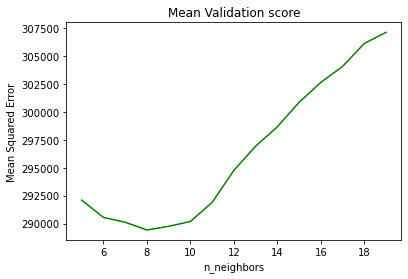

In [369]:
plt.plot(n_neighbors[:], mse[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Validation score')


* The lowest MSE value is for 8 neighbors

### Ploting Standard Deviation of MSE for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

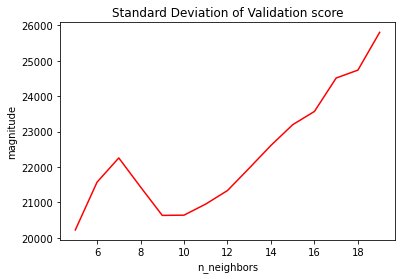

In [370]:
plt.plot(n_neighbors[:], std_mse[:], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Ploting MAE Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

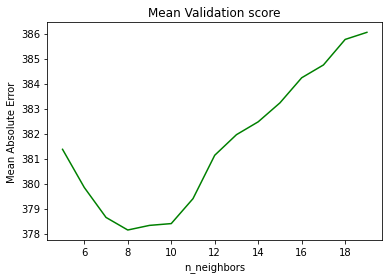

In [371]:
plt.plot(n_neighbors[:], mae[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Validation score')


* The lowest MAE value is for 8 neighbors

### Ploting Standard Deviation of MAE for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

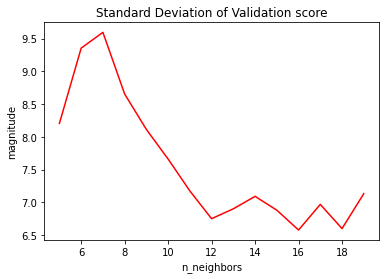

In [372]:
plt.plot(n_neighbors[:], std_mae[:], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal KNN model over test set

In [373]:
# Fitting model

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

reg = KNN(n_neighbors = 8)
reg.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=8)

In [374]:
# Train-test MSE

# Predicting test set and calculating MSE
train_predict = reg.predict(train_x)
k1 = mse(train_predict, train_y)
print('KNN Train MSE    ', k1 )

# Predicting test set and calculating MSE
test_predict = reg.predict(test_x)
k2 = mse(test_predict, test_y)
print('KNN Test MSE    ', k2 )

KNN Train MSE     219037.46545104167
KNN Test MSE     269263.89085625


In [375]:
# Train-test MAE

# Predicting test set and calculating MSE
train_predict = reg.predict(train_x)
k1 = mae(train_predict, train_y)
print('KNN Train MAE    ', k1 )

# Predicting test set and calculating MSE
test_predict = reg.predict(test_x)
k2 = mae(test_predict, test_y)
print('KNN Test MAE    ', k2 )

KNN Train MAE     329.44189166666666
KNN Test MAE     372.92345


# Linear Regression

### Segregating variables: Independent and Dependent Variables

In [376]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


In [377]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((725908, 15), (725908,))

### Splitting the data into train set and the test set

In [378]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

### Implementing Linear Regression

In [379]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [380]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [381]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k1 = mae(train_predict, train_y)
k2 = mse(train_predict, train_y)
print('Training Mean Absolute Error', k1 )
print('Training Mean Squared Error', k2 )

Training Mean Absolute Error 268.2601878293374
Training Mean Squared Error 211872.36930219218


In [382]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k1 = mae(test_predict, test_y)
k2 = mse(test_predict, test_y)
print('Test Mean Absolute Error', k1 )
print('Test Mean Squared Error', k2 )

Test Mean Absolute Error 269.9562697055975
Test Mean Squared Error 231801.15032480133


### Parameters of Linear Regression

In [383]:
lr.coef_

array([ 4.28335189e+00,  3.52082465e+00, -1.12097352e+03,  3.85324734e+02,
       -5.35219363e+02, -1.16667389e+03,  1.14926927e+00, -1.62080732e+01,
        1.61379813e+01, -4.46888990e-01,  4.32977039e+00,  1.02608087e-01,
        1.58075131e+02,  1.96361431e+02,  1.48330455e+01])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

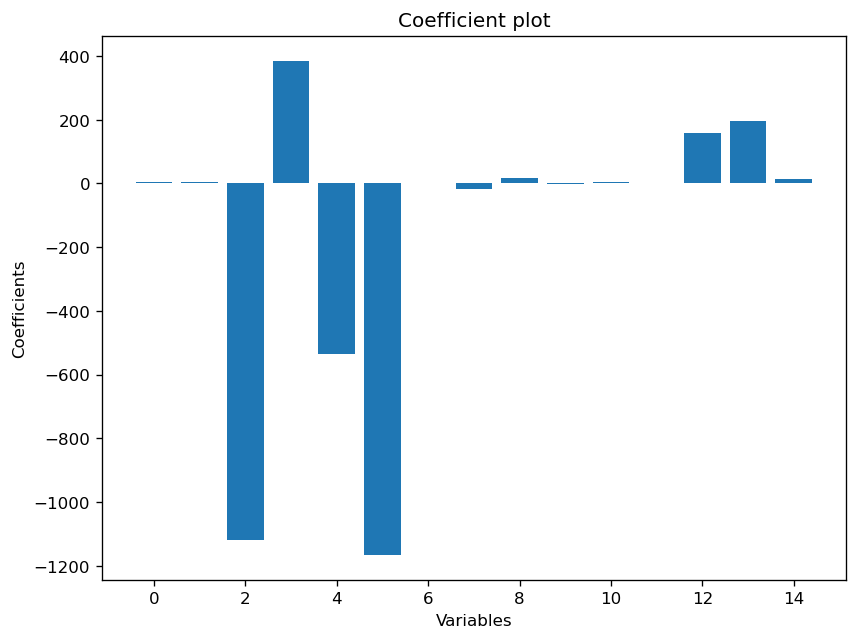

In [384]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
v = range(len(train_x.columns))
c = lr.coef_
plt.bar( v, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Feature Selection

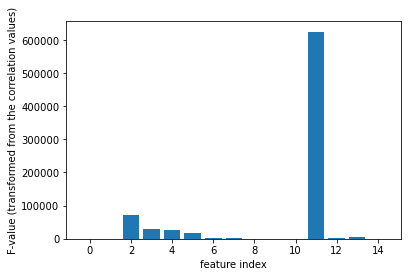

In [385]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(train_x, train_y)
# transform train input data
X_train_fs = f_selector.transform(train_x)
# transform test input data
X_test_fs = f_selector.transform(test_x)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

* Predictors with index 2,3,4,5,11 and 13 seem more important than other predictor

In [386]:
# Features that have higher correlation with target
x.iloc[:,[2,3,4,5,11,13]]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,OSRM_distance,trip_time_morning/afternoon
0,-73.953918,40.778873,-73.963875,40.771164,1630.9,1
1,-73.988312,40.731743,-73.994751,40.694931,5428.7,0
2,-73.997314,40.721458,-73.948029,40.774918,9327.8,1
3,-73.961670,40.759720,-73.956779,40.780628,8022.7,1
4,-74.017120,40.708469,-73.988182,40.740631,5468.7,0
...,...,...,...,...,...,...
729300,-73.965919,40.789780,-73.952637,40.789181,1568.6,1
729301,-73.996666,40.737434,-74.001320,40.731911,1582.8,0
729302,-73.997849,40.761696,-74.001488,40.741207,2876.0,0
729303,-74.006706,40.708244,-74.013550,40.713814,1631.0,1


### Feature Selection using backward elimination

In [387]:
# Importing libraries

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [388]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_absolute_error')

In [389]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.3s finished
Features: 14/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   12.4s finished
Features: 13/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   10.4s finished
Features: 12/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.9s finished
Features: 11/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    7.4s finished
Features: 10/10

In [390]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_day_of_year', 'trip_day_of_week', 'OSRM_distance', 'is_weekday', 'trip_time_morning/afternoon', 'trip_time_evening']


### Feature Selection using forward selection

In [391]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=1, scoring='neg_mean_absolute_error')

In [392]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.3s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.7s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.8s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.0s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.0s finished
Features: 6/10[Parallel(

In [393]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_day_of_year', 'trip_day_of_week', 'OSRM_distance', 'is_weekday', 'trip_time_morning/afternoon', 'trip_time_evening']


* The results are the same for backward elimination and forward selection

## Checking model performance using a new subset of data based on feature selection methods 

In [451]:
# New dataframe with 10 features

datanew = x.iloc[:,[2,3,4,5,6,8,11,12,13,14]]

datanew.columns

IndexError: positional indexers are out-of-bounds

In [452]:
#seperating independent and dependent variables
x = datanew
y = data['trip_duration']
x.shape, y.shape

((725908, 10), (725908,))

### Splitting the data into train set and the test set

In [453]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

### Implementing Linear Regression

In [454]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [455]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [456]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k1 = mae(train_predict, train_y)
k2 = mse(train_predict, train_y)
print('Training Mean Absolute Error', k1 )
print('Training Mean Squared Error', k2 )

Training Mean Absolute Error 268.2130286012357
Training Mean Squared Error 212013.64386165736


In [457]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k1 = mae(test_predict, test_y)
k2 = mse(test_predict, test_y)
print('Test Mean Absolute Error', k1 )
print('Test Mean Squared Error', k2 )

Test Mean Absolute Error 269.90254039035557
Test Mean Squared Error 231967.21401884436


* The 10 feature model performance is similar to the previous 16 feature model. Hence, the 10 predictor model will be used in all further steps.

## Checking assumptions of regression

* Some of the the variables will be transformed below:

### Checking normality of target variable - Trip duration

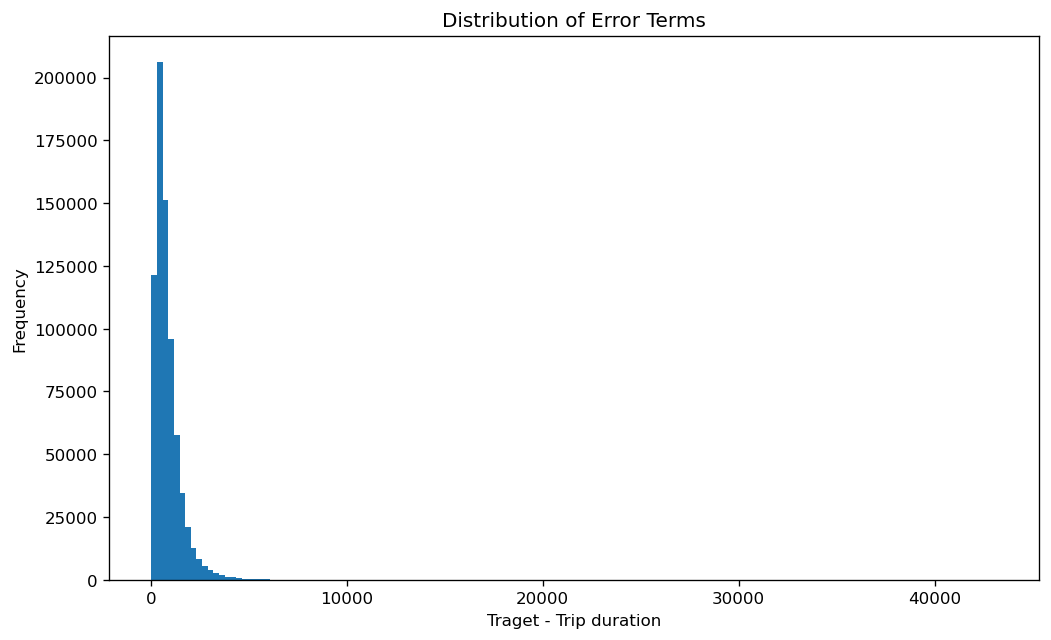

In [458]:
# Histogram for target variable - Trip duration
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(y, bins = 150)
plt.xlabel('Traget - Trip duration')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

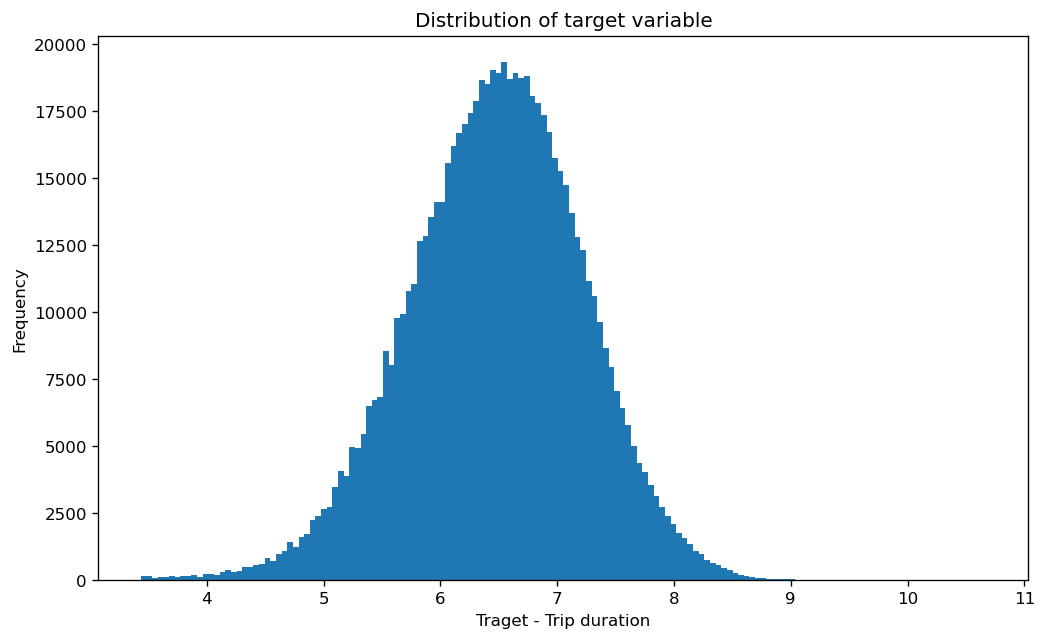

In [459]:
# Taking log of the target variable - Trip duration

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(np.log(y), bins = 150)
plt.xlabel('Traget - Trip duration')
plt.ylabel('Frequency')
plt.title('Distribution of target variable')
plt.show()

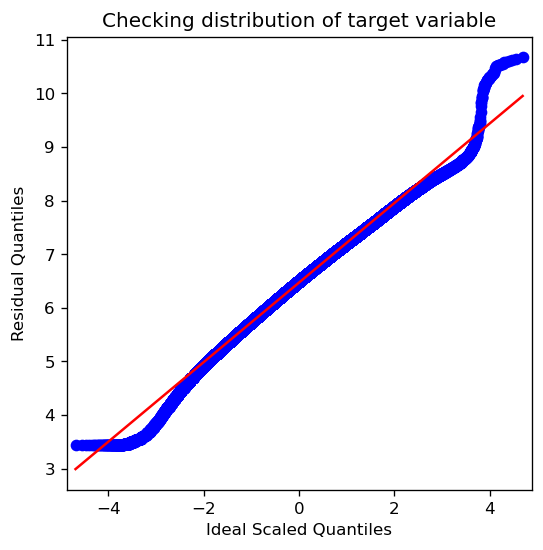

In [460]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(np.log(y), line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of target variable')
plt.show()

* The above Q-Q plot implies that our target variables has more extreme values than the expected number of extreme values had it been a sample taken from a normal distribution

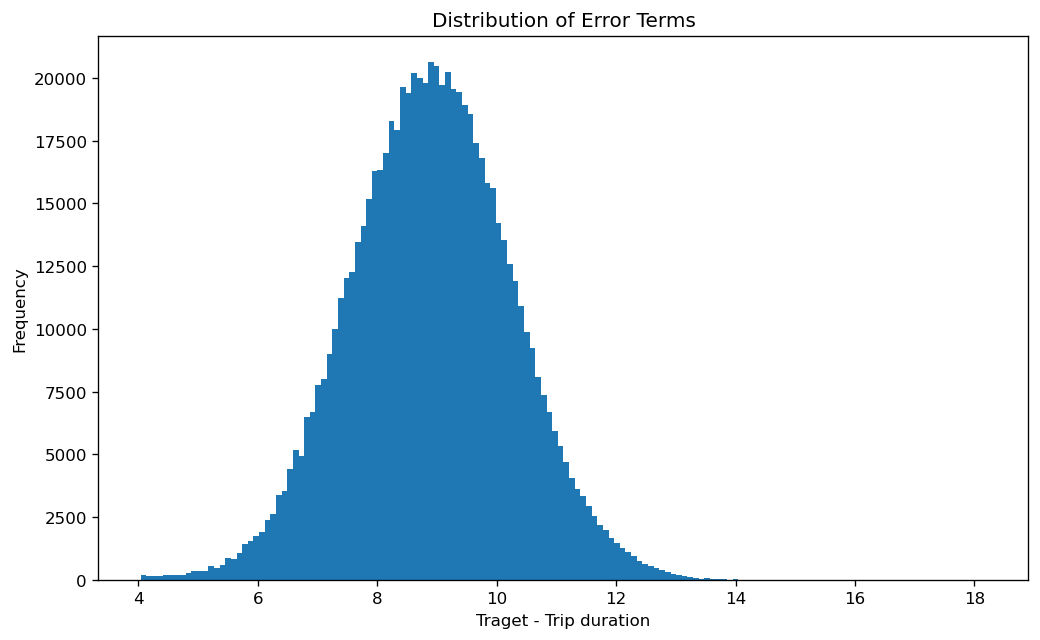

In [461]:
#Trying Box-Cox transformation on Y
from scipy.stats import boxcox 
import seaborn as sns 

transformed_y, best_lambda = boxcox(y) 

#plot the distribution of the transformed data values
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(transformed_y, bins = 150)
plt.xlabel('Traget - Trip duration')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()



In [462]:
print(best_lambda)

0.09243238447368925


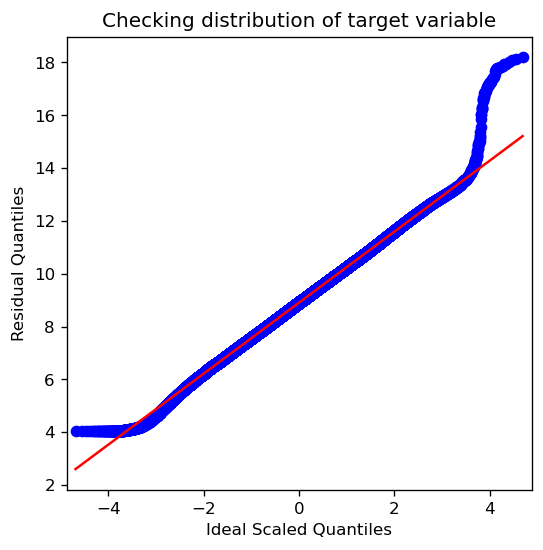

In [463]:
## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(transformed_y, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of target variable')
plt.show()

* The target distribution still shows more extreme values than the expected data from a normal distribution.

* However, Box-Cox method gives a better normal distribution for Y than log transformation. The box-cox transformed Y with lamda=0.0924 will be used in further steps

In [464]:
# Changing y to (y^0.0924 – 1) / 0.0924

y = pd.DataFrame(transformed_y)
y.columns =['Target-Trip Duration']
y.head()

,Target-Trip Duration
0,8.004351
1,9.849308
2,10.620500
3,9.919337
4,9.358182


### Checking multicollinearity assumption

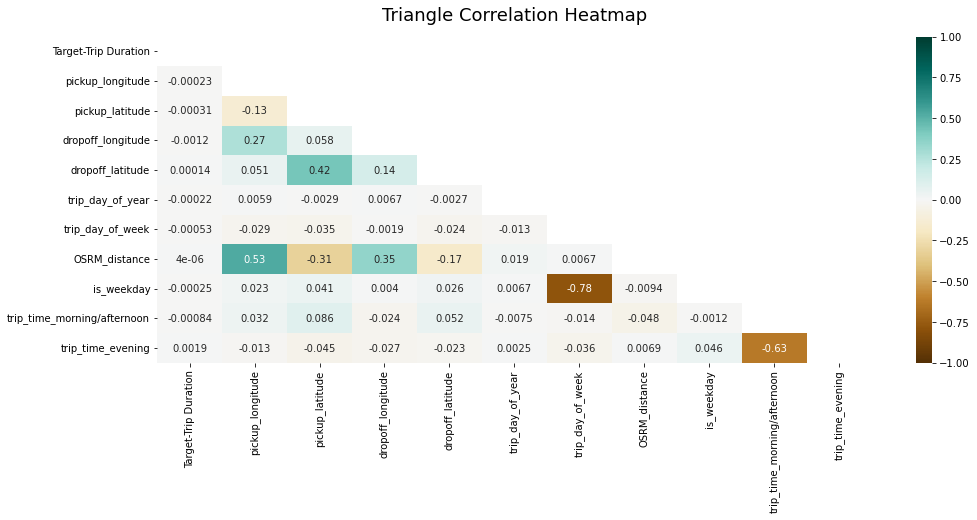

In [465]:
# Heatmap for correlation

tempdata =  pd.concat([y, x], axis=1)

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(tempdata.corr(), dtype=np.bool))
heatmap = sns.heatmap(tempdata.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);      

In [466]:
# Function for calulating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [467]:
calc_vif(x)

,variables,VIF
0,pickup_longitude,3.558238e+06
1,pickup_latitude,2.512482e+06
2,dropoff_longitude,3.056283e+06
3,dropoff_latitude,1.752807e+06
4,trip_day_of_year,4.178267e+00
5,trip_day_of_week,8.852773e+00
6,OSRM_distance,1.850739e+00
7,is_weekday,9.049731e+00
8,trip_time_morning/afternoon,2.974922e+00
9,trip_time_evening,2.550195e+00


* Since pickup/dropoff coordinates are correlated which results in a high VIF, coordinates of dropoff will be dropped

In [468]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day_of_year,trip_day_of_week,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,-73.953918,40.778873,-73.963875,40.771164,60,0,1630.9,1,1,0
1,-73.988312,40.731743,-73.994751,40.694931,71,4,5428.7,1,0,1
2,-73.997314,40.721458,-73.948029,40.774918,52,6,9327.8,0,1,0
3,-73.961670,40.759720,-73.956779,40.780628,5,1,8022.7,1,1,0
4,-74.017120,40.708469,-73.988182,40.740631,48,2,5468.7,1,0,0


In [469]:
x = x.drop(labels=['pickup_longitude', 'pickup_latitude'], axis=1)

In [470]:
x.head()

,dropoff_longitude,dropoff_latitude,trip_day_of_year,trip_day_of_week,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,-73.963875,40.771164,60,0,1630.9,1,1,0
1,-73.994751,40.694931,71,4,5428.7,1,0,1
2,-73.948029,40.774918,52,6,9327.8,0,1,0
3,-73.956779,40.780628,5,1,8022.7,1,1,0
4,-73.988182,40.740631,48,2,5468.7,1,0,0


In [471]:
calc_vif(x)

,variables,VIF
0,dropoff_longitude,1.030951e+06
1,dropoff_latitude,1.031055e+06
2,trip_day_of_year,4.178189e+00
3,trip_day_of_week,8.850020e+00
4,OSRM_distance,1.776206e+00
5,is_weekday,9.046151e+00
6,trip_time_morning/afternoon,2.944229e+00
7,trip_time_evening,2.543222e+00


* Dropping one of the pickup coordinates due to high VIF value

In [472]:
x = x.drop(labels=['dropoff_latitude'], axis=1)

In [473]:
x.head()

,dropoff_longitude,trip_day_of_year,trip_day_of_week,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,-73.963875,60,0,1630.9,1,1,0
1,-73.994751,71,4,5428.7,1,0,1
2,-73.948029,52,6,9327.8,0,1,0
3,-73.956779,5,1,8022.7,1,1,0
4,-73.988182,48,2,5468.7,1,0,0


In [474]:
calc_vif(x)

,variables,VIF
0,dropoff_longitude,31.614136
1,trip_day_of_year,4.178186
2,trip_day_of_week,8.849971
3,OSRM_distance,1.773246
4,is_weekday,9.044541
5,trip_time_morning/afternoon,2.943614
6,trip_time_evening,2.542559


In [424]:
x = x.drop(labels=['dropoff_longitude'], axis=1)

In [425]:
calc_vif(x)

,variables,VIF
0,trip_day_of_year,3.740152
1,trip_day_of_week,3.011284
2,OSRM_distance,1.722195
3,is_weekday,3.261137
4,trip_time_morning/afternoon,2.621015
5,trip_time_evening,2.318237


* All remaining variables have a low VIF value

In [426]:
x.head()

,trip_day_of_year,trip_day_of_week,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,60,0,1630.9,1,1,0
1,71,4,5428.7,1,0,1
2,52,6,9327.8,0,1,0
3,5,1,8022.7,1,1,0
4,48,2,5468.7,1,0,0


In [475]:
y = y.iloc[:, 0]
y

0          8.004351
1          9.849308
2         10.620500
3          9.919337
4          9.358182
            ...    
725903     7.487693
725904     7.593267
725905     8.931687
725906     8.198635
725907    10.054376
Name: Target-Trip Duration, Length: 725908, dtype: float64

### Check linearity assumption

In [476]:
# Fitting model with all x and y values

linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [477]:
# Function for getting residuals

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

#### Actual vs Predicted value plot

In [478]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Predicted', y='Actual', data=df_results, fit_reg=False,size = 7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted Y values')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


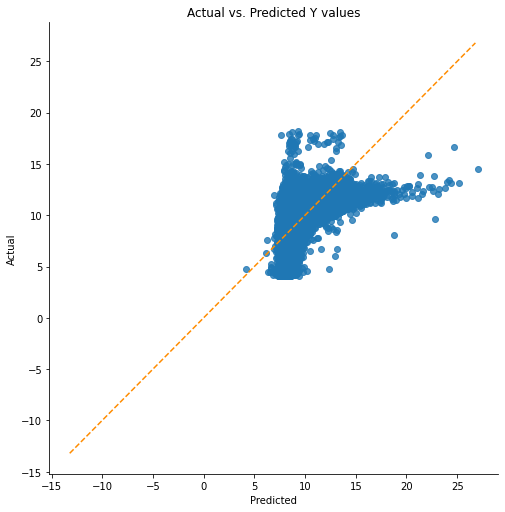

In [479]:
linear_assumption(linear_model, x, y)

#### Residual vs Predicted value plot

In [480]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Predicted', y='Residuals', data=df_results, fit_reg=False,size = 7)
        
    # Plotting the diagonal line
    plt.axhline(y = 0, color = 'darkorange', linestyle = '--')
    plt.title('Residual vs Predicted Y values')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


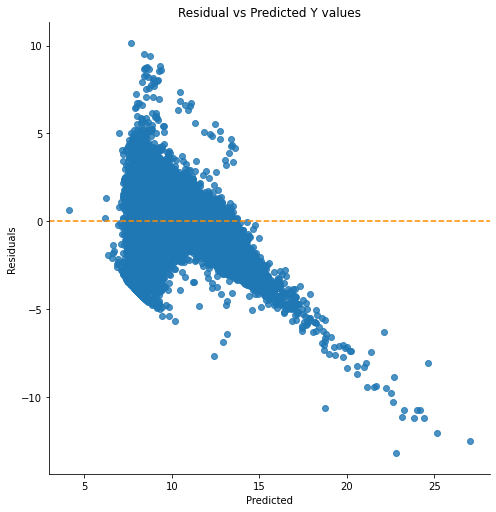

In [481]:
linear_assumption(linear_model, x, y)

* The above plots do not show a strong linear relation. Individual plots of predictor variables with the target variable will be made to check if the predictor variables could be transformed to get a stronger linear relation

* Transformations on predictors did not help fix the linearity assumption violation

### Checking normality of error terms assumption

In [482]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


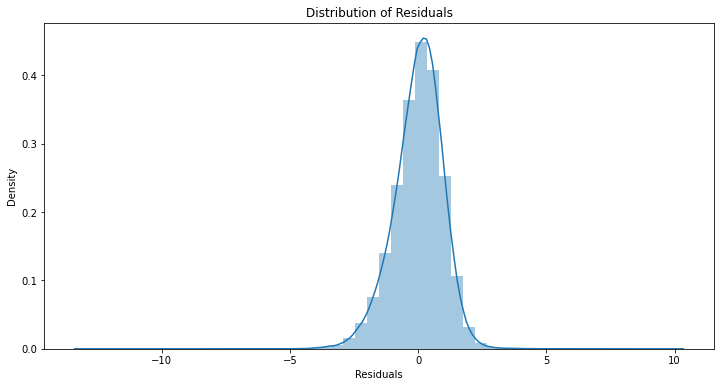


Assumption not satisfied

Confidence intervals will likely be affected


In [483]:
normal_errors_assumption(linear_model, x, y)

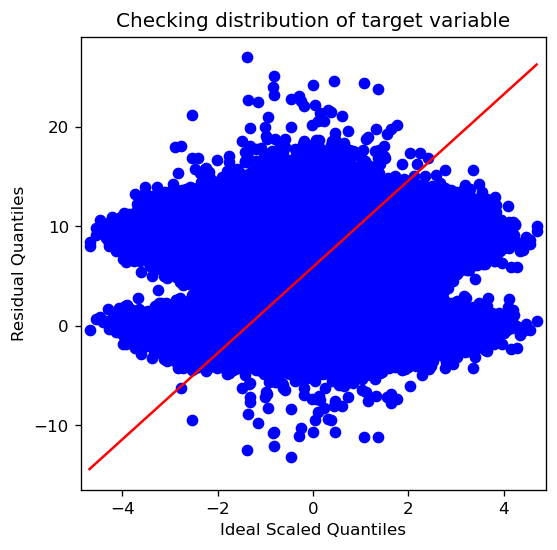

In [484]:
## Plotting the QQ plot for residuals

residuals = calculate_residuals(linear_model, x, y)

fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of target variable')
plt.show()

### Checking No Autocorrelation of error terms assumption

In [485]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [486]:
autocorrelation_assumption(linear_model, x, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.998573702062193
Little to no autocorrelation 

Assumption satisfied


###  Checking Homoscedasticity (constant variance of error terms) assumption

In [487]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


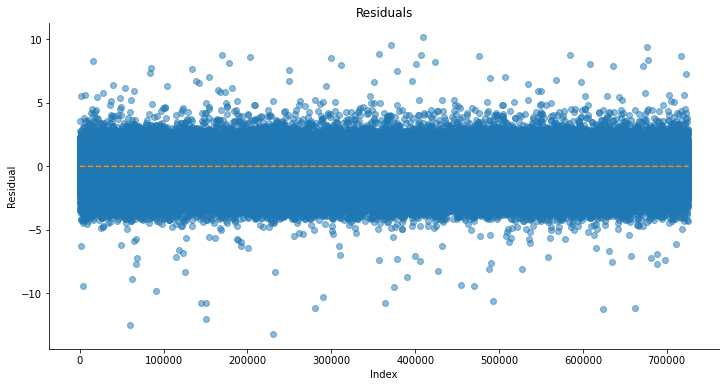

In [488]:
homoscedasticity_assumption(linear_model, x, y)

* The error terms seem evenly spread

### Scores using CV

In [489]:
x.head()

,dropoff_longitude,trip_day_of_year,trip_day_of_week,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,-73.963875,60,0,1630.9,1,1,0
1,-73.994751,71,4,5428.7,1,0,1
2,-73.948029,52,6,9327.8,0,1,0
3,-73.956779,5,1,8022.7,1,1,0
4,-73.988182,48,2,5468.7,1,0,0


In [490]:
y

0          8.004351
1          9.849308
2         10.620500
3          9.919337
4          9.358182
            ...    
725903     7.487693
725904     7.593267
725905     8.931687
725906     8.198635
725907    10.054376
Name: Target-Trip Duration, Length: 725908, dtype: float64

In [491]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

In [492]:
from sklearn.model_selection import cross_validate
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']
score = cross_validate(lr , X = train_x, y = train_y, cv = 10, scoring=scoring)
score

{'fit_time': array([0.06224751, 0.07811975, 0.07813954, 0.07812119, 0.06251001,
        0.06251407, 0.07812119, 0.06250358, 0.06250405, 0.06251454]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01562691, 0.        , 0.        ]),
 'test_neg_mean_squared_error': array([-0.91123929, -0.92517615, -0.91385588, -0.90978833, -0.91221961,
        -0.92511081, -0.91011236, -0.92546057, -0.91651114, -0.9044702 ]),
 'test_neg_mean_absolute_error': array([-0.74210146, -0.74635866, -0.74228129, -0.73891559, -0.74331059,
        -0.74630911, -0.74341668, -0.74660155, -0.74515573, -0.73803883])}

### Mean Squared Error scores for Linear Regression (using CV)

In [493]:
-score['test_neg_mean_squared_error'].mean(),score['test_neg_mean_squared_error'].std()

(0.9153944346725444, 0.00707844374439566)

### Mean Absolute Error scores for Linear Regression (using CV)

In [494]:
-score['test_neg_mean_absolute_error'].mean(),score['test_neg_mean_absolute_error'].std()

(0.7432489485839324, 0.002865641090548829)

### Checking scores on test and train set in terms of original Y values (before transformation)

In [495]:
# Train-test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

In [496]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

#### Predicting over the train set

In [497]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)

train_predict = np.power(((train_predict*best_lambda) + 1),1/best_lambda)      # Getting Y in original terms (inverse of Box-Cox Transform)
train_y = np.power(((train_y*best_lambda) + 1),1/best_lambda)

k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

k2 = mse(train_predict, train_y)
print('Training Mean Squared Error', k2 )

Training Mean Absolute Error 347.57032724830424
Training Mean Squared Error 2559457.666752912


#### Predicting over the test set

In [498]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)

test_predict = np.power(((test_predict*best_lambda) + 1),1/best_lambda)      # Getting Y in original terms (inverse of Box-Cox Transform)
test_y = np.power(((test_y*best_lambda) + 1),1/best_lambda)

k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

k2 = mse(test_predict, test_y)
print('Training Mean Squared Error', k2 )

Test Mean Absolute Error     353.0258801784358
Training Mean Squared Error 4610772.820986907


* The score for our model drops when we remove the terms with high VIF. Also, since the error term normality assumption is still not met, the inferences/ confidence limits drawn from the model are not reliable.

* 10 predictor model will be used in further analysis since it makes better predcitions and all the assumptions of regression could not be fixed in the 6 predcitor model.

* Ridge and Lasso regression will be used on the 10 predictor model in the next step

# Ridge Regression

In [511]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


In [512]:
df = data

In [513]:
# Predictor dataframe with 10 predictors
x = df.iloc[:,[2,3,4,5,7,9,12,13,14,15]]
x.columns


Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_day_of_year', 'trip_day_of_week',
       'OSRM_distance', 'is_weekday', 'trip_time_morning/afternoon',
       'trip_time_evening'],
      dtype='object')

In [514]:
# Target variable
y = df['trip_duration']

In [515]:
x.shape, y.shape

((725908, 10), (725908,))

### Splitting the data into train set and the test set

In [516]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

### Running ridge model for lamda=1

In [517]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# define model
model = Ridge(alpha=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']

# evaluate model
scores = cross_validate(model, train_x, train_y, scoring=scoring, cv=cv, n_jobs=-1)

# scores
print('Mean MSE: %.3f (%.3f)' % (mean(-scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))
print('Mean MAE: %.3f (%.3f)' % (mean(-scores['test_neg_mean_absolute_error']), std(scores['test_neg_mean_absolute_error'])))


Mean MSE: 212042.701 (36985.635)
Mean MAE: 268.229 (1.477)


### Chossing best lamda for ridge

In [518]:
# use automatically configured the ridge regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(train_x, train_y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


* Since, the best result was obtained at alpha=0 (same as linear regression), ridge regression will not be used for this model

# Lasso Regression

In [519]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


In [520]:
df = data

### Segregating variables: Independent and Dependent Variables

In [521]:
#seperating independent and dependent variables

# Predictor dataframe with 11 predictors
x = df.iloc[:,[2,3,4,5,7,9,12,13,14,15]]

# Target variable
y = df['trip_duration']

x.shape, y.shape

((725908, 10), (725908,))

### Splitting the data into train set and the test set

In [522]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

### Running Lasso model for lamda=1

In [523]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# define model
model = Lasso(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']

# evaluate model
scores = cross_validate(model, train_x, train_y, scoring=scoring, cv=cv, n_jobs=-1)

# scores
print('Mean MSE: %.3f (%.3f)' % (mean(-scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))
print('Mean MAE: %.3f (%.3f)' % (mean(-scores['test_neg_mean_absolute_error']), std(scores['test_neg_mean_absolute_error'])))


Mean MSE: 214136.292 (36974.804)
Mean MAE: 272.180 (1.462)


### Chossing best lamda for Lasso

In [524]:
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# fit model
model.fit(train_x, train_y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


* Since, the best result was obtained at alpha=0 (same as linear regression), lasso regression will not be used for this model

## Decision Tree

In [526]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


In [527]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((725908, 15), (725908,))

In [528]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

In [529]:
# Creating Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [756]:
# Parameters to tune for decision tree
param_dict = {
    "max_depth":range(3,15),
    "min_samples_split":range(500,1000),
    "min_samples_leaf":range(100,500)
}

In [539]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(dt_model, param_distributions=param_dict,cv=10,verbose=1,n_jobs=-1,n_iter= 10)
randomsearch.fit(train_x, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 15),
                                        'min_samples_leaf': range(100, 500),
                                        'min_samples_split': range(500, 1000)},
                   verbose=1)

In [540]:
# Best paramters for decision tree
randomsearch.best_params_

{'min_samples_split': 701, 'min_samples_leaf': 133, 'max_depth': 14}

In [541]:
randomsearch.best_estimator_

DecisionTreeRegressor(max_depth=14, min_samples_leaf=133, min_samples_split=701,
                      random_state=1)

In [542]:
# Creating the best model

model = DecisionTreeRegressor(max_depth=14, min_samples_leaf=133, min_samples_split=701,
                      random_state=1)

In [543]:
# Fitting training data on the best model

model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=133, min_samples_split=701,
                      random_state=1)

#### Importing libraries for calculating scores

In [544]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

#### MSE on Train Set

In [721]:
train_predict = model.predict(train_x)
mse(train_predict, train_y)

119673.76589919942

#### MSE on Test Set

In [722]:
test_predict = model.predict(test_x)
mse(test_predict, test_y)

104371.81725744806

#### MAE on Train Set

In [723]:
train_predict = model.predict(train_x)
mae(train_predict, train_y)

215.69230783321956

#### MAE on Test Set

In [724]:
test_predict = model.predict(test_x)
mae(test_predict, test_y)

206.8956036139894

#### Visualizing the decision tree model

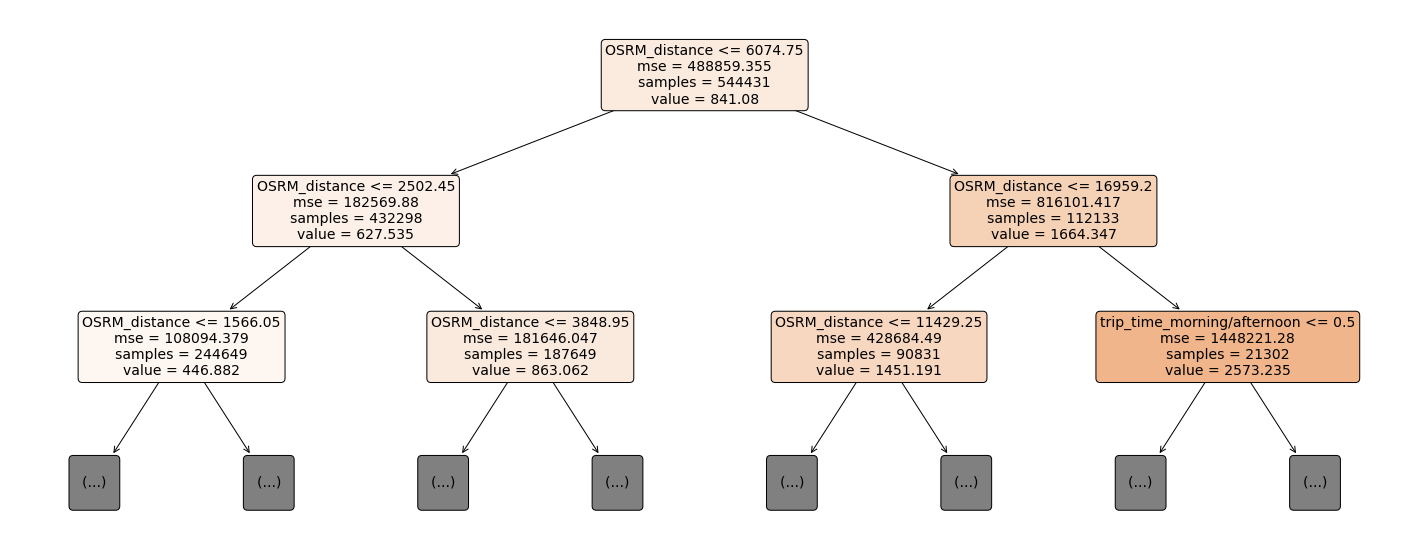

In [549]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=train_x.columns,  
              max_depth = 2,
              filled=True, 
              rounded=True, 
              fontsize=14)

## Random Forest

In [812]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day_of_year,trip_month_of_year,trip_day_of_week,trip_day_of_month,trip_hour,OSRM_distance,is_weekday,trip_time_morning/afternoon,trip_time_evening
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,60,2,0,29,16,1630.9,1,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,71,3,4,11,23,5428.7,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,52,2,6,21,17,9327.8,0,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,5,1,1,5,9,8022.7,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,48,2,2,17,6,5468.7,1,0,0


In [813]:
# separating dependent and independent variables
x = data.drop(['trip_duration'],axis=1)
y = data['trip_duration']
x.shape,y.shape

((725908, 15), (725908,))

In [814]:
# importing test-train split to create validation set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=1)

In [815]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor

In [816]:
#creating a random forest instance
rf = RandomForestRegressor(random_state=0)

In [817]:
#train the model
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

#### MSE on train set

In [818]:
train_predict = rf.predict(train_x)
mse(train_predict,train_y)

21284.202677917132

#### MSE on test set

In [819]:
test_predict = rf.predict(test_x)
mse(test_predict,test_y)

167647.81720403003

#### MAE on train set

In [820]:
mae(train_predict,train_y)

70.558981370021

#### MAE on test set

In [821]:
mae(test_predict,test_y)

190.60925346646312

### Hyperparameter tuning

In [824]:
# Parameters to tune for random forest

param_dict = {
    "max_depth":range(10,100),
    "min_samples_split":range(200,1000),
    "min_samples_leaf":range(50,500),
    "bootstrap":[True,False]
}

In [825]:
# Randomized seacrh for best parameters

from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(rf, param_distributions=param_dict,cv=10,verbose=1,n_jobs=-1,n_iter=10)
randomsearch.fit(train_x,train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(10, 100),
                                        'min_samples_leaf': range(50, 500),
                                        'min_samples_split': range(200, 1000)},
                   verbose=1)

In [826]:
# Best parameters for random forest

randomsearch.best_params_

{'min_samples_split': 603,
 'min_samples_leaf': 378,
 'max_depth': 90,
 'bootstrap': True}

In [827]:
randomsearch.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_leaf=378, min_samples_split=603,
                      random_state=0)

In [828]:
# Creating the best model

model = RandomForestRegressor(max_depth=90, min_samples_leaf=378, min_samples_split=603,
                      random_state=0)

In [829]:
# Fitting training data to best model

model.fit(train_x,train_y)

RandomForestRegressor(max_depth=90, min_samples_leaf=378, min_samples_split=603,
                      random_state=0)

#### MSE on train set

In [830]:
train_predict = model.predict(train_x)
mse(train_predict,train_y)

162554.9114009587

#### MSE on test set

In [831]:
test_predict = model.predict(test_x)
mse(test_predict,test_y)

182712.83339292236

#### MAE on train set

In [832]:
mae(train_predict,train_y)

208.69103539913743

#### MAE on test set

In [833]:
mae(test_predict,test_y)

211.65811333334543

## Results

* The decision tree model outperforms Linear regression, Ridge, Lasso and KNN.

* The final scores obtained using the decision tree model are:
* Training Mean Absolute Error:     323.398
* Training Mean Squared Error:     240400.740
* Test Mean Absolute Error:     327.143
* Test Mean Squared Error:     274030.892